# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:36:03.306877: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:36:06.466054
2025-04-14 19:36:06.466054


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:36:01"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

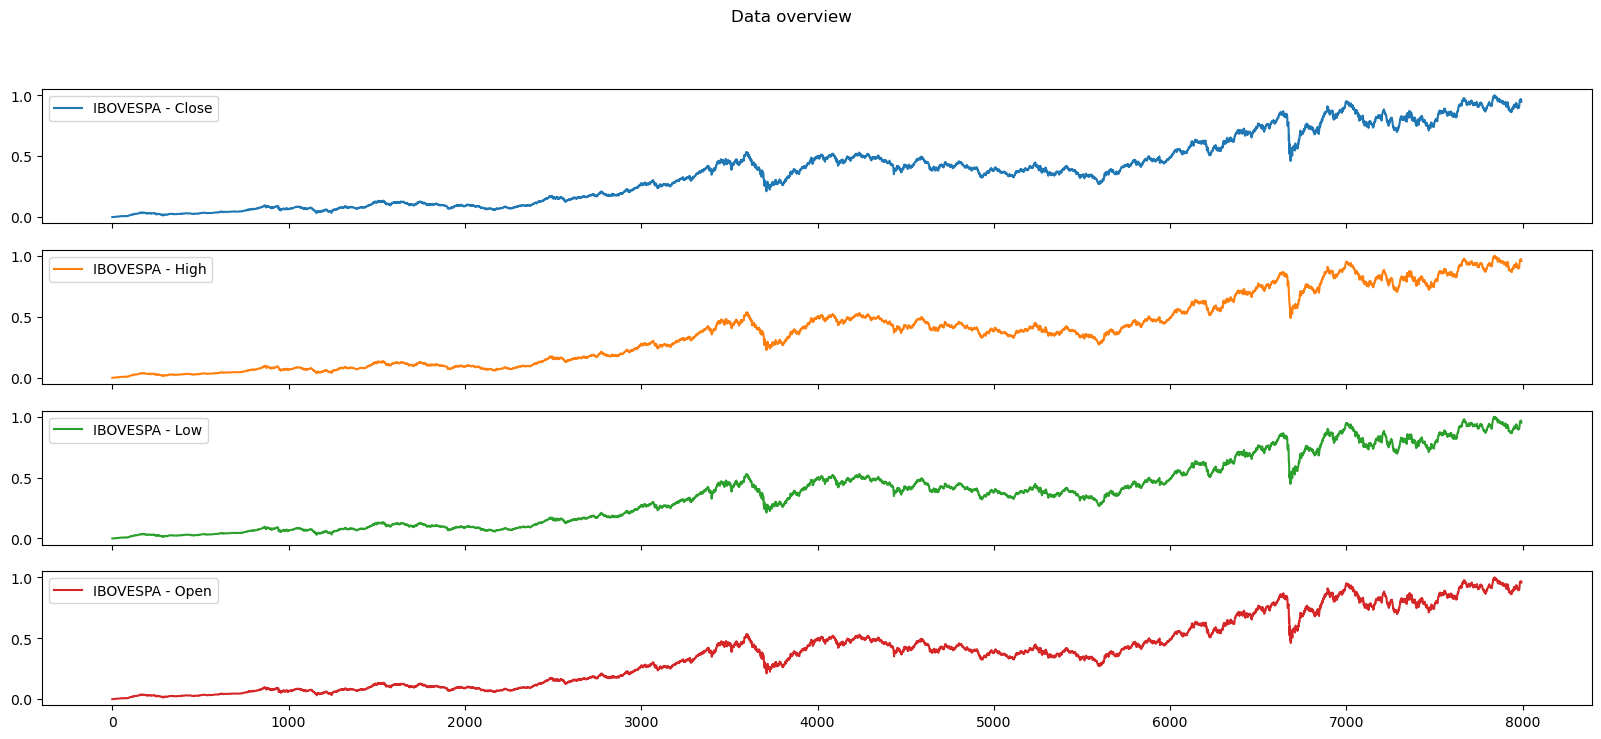

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

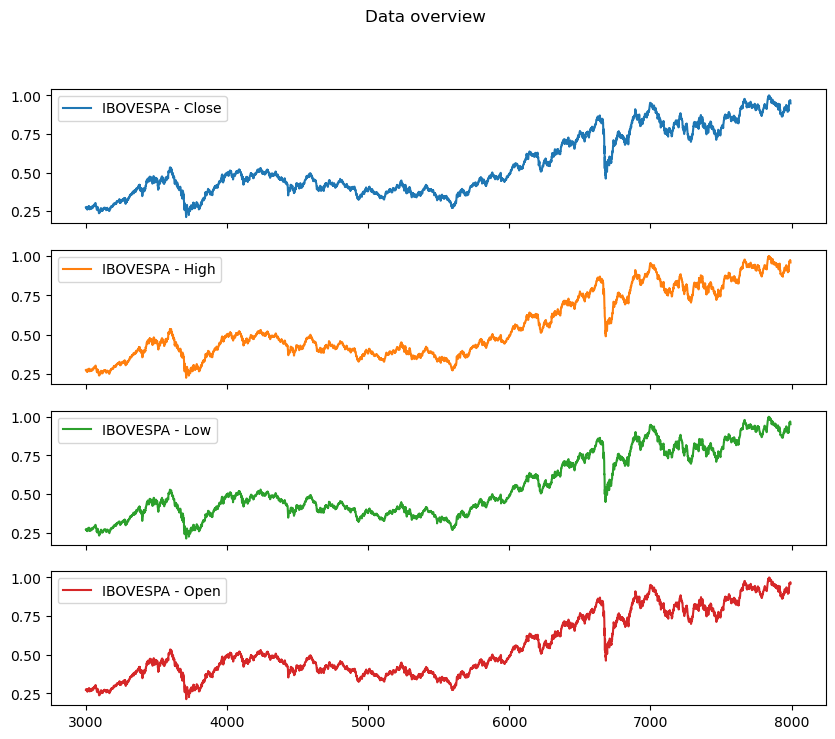

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

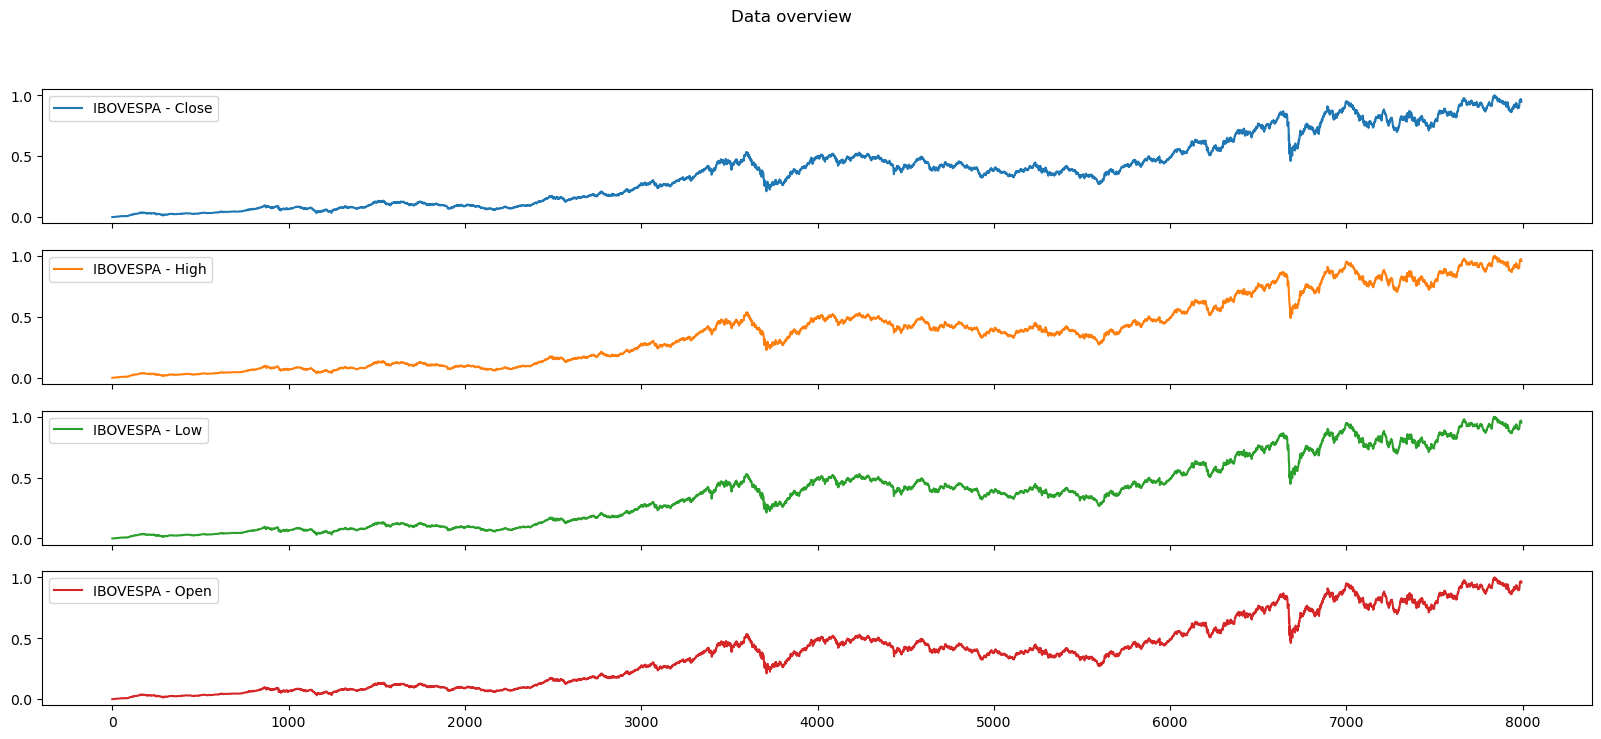

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

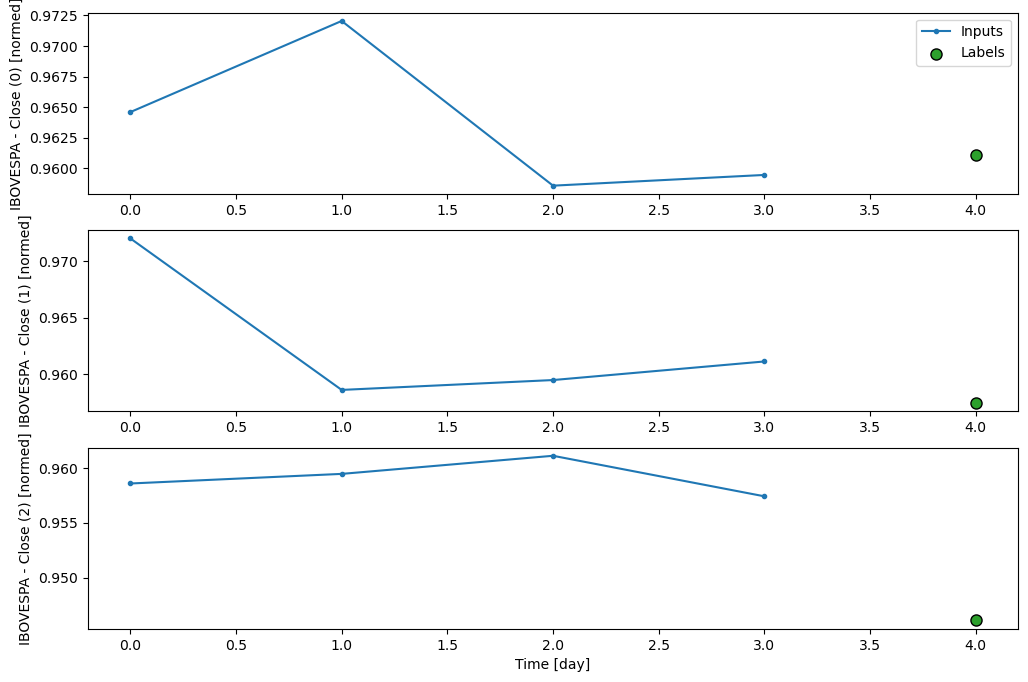

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

4

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:20 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 62.4378 - mean_squared_error: 2.8368e-05 - root_mean_squared_error: 0.0049  

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.7214 - mean_squared_error: 6.1092e-05 - root_mean_squared_error: 0.0072

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 46.0448 - mean_squared_error: 7.0468e-05 - root_mean_squared_error: 0.0080 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 40.9446 - mean_squared_error: 6.8611e-05 - root_mean_squared_error: 0.0080

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 37.3583 - mean_squared_error: 7.3022e-05 - root_mean_squared_error: 0.0083

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 35.2165 - mean_squared_error: 7.9671e-05 - root_mean_squared_error: 0.0087

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 33.2675 - mean_squared_error: 9.2341e-05 - root_mean_squared_error: 0.0093

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.0294 - mean_squared_error: 1.1097e-04 - root_mean_squared_error: 0.0101

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.8323 - mean_squared_error: 1.3001e-04 - root_mean_squared_error: 0.0109

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.1447 - mean_squared_error: 1.3888e-04 - root_mean_squared_error: 0.0112

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.4021 - mean_squared_error: 1.4734e-04 - root_mean_squared_error: 0.0116

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.6151 - mean_squared_error: 1.6504e-04 - root_mean_squared_error: 0.0122

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 28.0350 - mean_squared_error: 1.8425e-04 - root_mean_squared_error: 0.0129

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 27.5457 - mean_squared_error: 1.9831e-04 - root_mean_squared_error: 0.0133

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 27.2228 - mean_squared_error: 2.0668e-04 - root_mean_squared_error: 0.0136

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.8335 - mean_squared_error: 2.1782e-04 - root_mean_squared_error: 0.0139

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 26.3838 - mean_squared_error: 2.3249e-04 - root_mean_squared_error: 0.0144

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 25.8928 - mean_squared_error: 2.5881e-04 - root_mean_squared_error: 0.0151

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 25.4988 - mean_squared_error: 3.1993e-04 - root_mean_squared_error: 0.0163

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 25.1976 - mean_squared_error: 4.5883e-04 - root_mean_squared_error: 0.0183

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 25.0111 - mean_squared_error: 5.7709e-04 - root_mean_squared_error: 0.0199

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 24.7114 - mean_squared_error: 7.4660e-04 - root_mean_squared_error: 0.0221

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 24.4191 - mean_squared_error: 8.9921e-04 - root_mean_squared_error: 0.0241

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 24.1652 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0257    

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 23.9139 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0271

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 23.6710 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0284

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 23.4755 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0294

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 23.2583 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0305

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 23.1417 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.9739 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.8653 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0327

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 22.6750 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.4659 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0348

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 22.3205 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0357

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 22.1368 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 21.9541 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0384


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 21.8867 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0388 - val_loss: 0.1626 - val_mean_absolute_error: 0.1626 - val_mean_absolute_percentage_error: 17.4527 - val_mean_squared_error: 0.0278 - val_root_mean_squared_error: 0.1667


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - mean_absolute_percentage_error: 22299.9922 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4756

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4514 - mean_absolute_error: 0.4514 - mean_absolute_percentage_error: 10241.1807 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4526  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 6867.2017 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3967 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 5438.5771 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3575

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 4654.8892 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3319

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 4088.5969 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.3112

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 3722.6348 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2968

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 3478.7280 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2866

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 3268.1050 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2775

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 3041.7383 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2673

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 2711.4761 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2515

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 2452.0952 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2384

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 2242.2581 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2272

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 2068.6580 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2175

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 1952.8634 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2108

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 1836.8801 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2039

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1723.2854 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1969

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1655.7810 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1926

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 1593.8798 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1887

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 1536.8877 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1850

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1475.8235 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1810

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1427.5756 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1777

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1397.2942 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1757

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 1347.5664 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1723

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1282.9097 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1677

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1241.5575 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1648

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1203.0327 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1620

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1172.0522 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1597

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 1138.0560 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1572

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1106.1572 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1548

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1076.1649 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1526

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 1044.0133 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1503

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 1013.9111 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1482

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 996.0460 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1469 

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 982.2438 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1459

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 972.1646 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1452


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 955.8671 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1440 - val_loss: 0.0401 - val_mean_absolute_error: 0.0401 - val_mean_absolute_percentage_error: 4.2709 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0456


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 11355.3291 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2423

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 5945.7920 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2230  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 4499.2651 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2035

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 3705.8071 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1910

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 2996.5039 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1794

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 2539.3806 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1687

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 2312.7676 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1623

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 2127.9883 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1566

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 1907.1270 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1494

 45/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1759.8978 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1443

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1613.8970 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1388

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1530.8129 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1355

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1474.5555 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1332

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1359.7750 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1282

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 1250.9506 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1232

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1181.3143 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1198

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1119.8948 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1167

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1065.2664 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1139

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 993.6669 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1102 

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 932.0319 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1068 

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 878.3327 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1037

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 836.0776 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1013

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 798.1151 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0990

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 772.0605 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0975

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 740.1171 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0955

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 710.9690 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0936

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 684.2520 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0919

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 656.7267 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0900

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 631.5405 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0883

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 608.3975 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0867

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 587.0527 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0852

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 567.3014 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0837

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 548.9681 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0824

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 531.9025 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0813

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 514.2680 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0801


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 510.8989 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0798 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236 - val_mean_absolute_percentage_error: 2.6324 - val_mean_squared_error: 8.6917e-04 - val_root_mean_squared_error: 0.0295


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 2692.1807 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 1006.1987 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 723.1675 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 568.2525 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 483.7947 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 416.4958 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 367.9580 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 326.7403 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 297.9738 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 277.1907 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 254.9319 - mean_squared_error: 9.4125e-04 - root_mean_squared_error: 0.0298

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 236.3900 - mean_squared_error: 8.8917e-04 - root_mean_squared_error: 0.0288

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 220.6787 - mean_squared_error: 8.4517e-04 - root_mean_squared_error: 0.0280

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 208.5973 - mean_squared_error: 8.1432e-04 - root_mean_squared_error: 0.0275

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 196.6793 - mean_squared_error: 7.8486e-04 - root_mean_squared_error: 0.0270

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 186.2139 - mean_squared_error: 7.6016e-04 - root_mean_squared_error: 0.0266

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 175.9703 - mean_squared_error: 7.3656e-04 - root_mean_squared_error: 0.0262

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 168.6441 - mean_squared_error: 7.1924e-04 - root_mean_squared_error: 0.0258

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 161.1775 - mean_squared_error: 7.0076e-04 - root_mean_squared_error: 0.0255

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 155.1360 - mean_squared_error: 6.8520e-04 - root_mean_squared_error: 0.0252

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 149.5814 - mean_squared_error: 6.7041e-04 - root_mean_squared_error: 0.0249

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 144.4549 - mean_squared_error: 6.5631e-04 - root_mean_squared_error: 0.0247

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 139.7090 - mean_squared_error: 6.4305e-04 - root_mean_squared_error: 0.0244

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 134.7723 - mean_squared_error: 6.2917e-04 - root_mean_squared_error: 0.0241

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 130.2135 - mean_squared_error: 6.1676e-04 - root_mean_squared_error: 0.0239

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 125.9904 - mean_squared_error: 6.0653e-04 - root_mean_squared_error: 0.0237

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 122.0689 - mean_squared_error: 6.0020e-04 - root_mean_squared_error: 0.0236

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 119.6077 - mean_squared_error: 6.0017e-04 - root_mean_squared_error: 0.0236

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.1265 - mean_squared_error: 6.0690e-04 - root_mean_squared_error: 0.0238


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 114.2928 - mean_squared_error: 6.1215e-04 - root_mean_squared_error: 0.0239 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_absolute_percentage_error: 1.8292 - val_mean_squared_error: 4.7748e-04 - val_root_mean_squared_error: 0.0219


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 6295.7959 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1343

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 2403.2935 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1001 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 1617.0532 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0836

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 1225.5309 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0741

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 1019.5286 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0685

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 879.5574 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 777.0599 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 698.1976 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 635.3466 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 583.9532 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 536.7488 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 501.0049 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 470.2022 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 443.3571 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 417.3280 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 398.8537 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 380.1340 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 363.2712 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 346.3766 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 332.5905 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 318.6278 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 307.1223 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 295.3679 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 285.6089 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 276.5430 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 268.0959 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 261.0553 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411 - val_loss: 0.0398 - val_mean_absolute_error: 0.0398 - val_mean_absolute_percentage_error: 4.2583 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0418


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 1570.9575 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 519.0517 - mean_squared_error: 6.0770e-04 - root_mean_squared_error: 0.0245

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 362.2946 - mean_squared_error: 5.1027e-04 - root_mean_squared_error: 0.0223

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 279.0732 - mean_squared_error: 4.3004e-04 - root_mean_squared_error: 0.0204

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 234.1292 - mean_squared_error: 3.7980e-04 - root_mean_squared_error: 0.0190

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 206.2710 - mean_squared_error: 3.4762e-04 - root_mean_squared_error: 0.0181

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 182.7175 - mean_squared_error: 3.1831e-04 - root_mean_squared_error: 0.0173

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 162.7583 - mean_squared_error: 2.9165e-04 - root_mean_squared_error: 0.0165

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 150.0769 - mean_squared_error: 2.7429e-04 - root_mean_squared_error: 0.0159

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 140.7101 - mean_squared_error: 2.6134e-04 - root_mean_squared_error: 0.0155

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 130.4638 - mean_squared_error: 2.4713e-04 - root_mean_squared_error: 0.0151

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 121.7756 - mean_squared_error: 2.3495e-04 - root_mean_squared_error: 0.0147

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 113.5370 - mean_squared_error: 2.2366e-04 - root_mean_squared_error: 0.0143

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 107.1285 - mean_squared_error: 2.1550e-04 - root_mean_squared_error: 0.0140

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 100.9158 - mean_squared_error: 2.0940e-04 - root_mean_squared_error: 0.0138

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 96.5079 - mean_squared_error: 2.0625e-04 - root_mean_squared_error: 0.0138 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 92.0419 - mean_squared_error: 2.0313e-04 - root_mean_squared_error: 0.0137

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 88.0182 - mean_squared_error: 2.0020e-04 - root_mean_squared_error: 0.0136

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 83.9862 - mean_squared_error: 1.9691e-04 - root_mean_squared_error: 0.0135

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 80.6967 - mean_squared_error: 1.9404e-04 - root_mean_squared_error: 0.0134

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 77.3659 - mean_squared_error: 1.9096e-04 - root_mean_squared_error: 0.0133

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 74.6220 - mean_squared_error: 1.8836e-04 - root_mean_squared_error: 0.0133

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 72.0885 - mean_squared_error: 1.8599e-04 - root_mean_squared_error: 0.0132

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 69.7427 - mean_squared_error: 1.8436e-04 - root_mean_squared_error: 0.0131

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 67.5682 - mean_squared_error: 1.8547e-04 - root_mean_squared_error: 0.0132

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 65.9840 - mean_squared_error: 1.8894e-04 - root_mean_squared_error: 0.0133

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 64.2770 - mean_squared_error: 1.9476e-04 - root_mean_squared_error: 0.0135


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 63.2611 - mean_squared_error: 1.9852e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335 - val_mean_absolute_percentage_error: 3.5714 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0363


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 2689.6292 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 1161.5461 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 780.7103 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 594.0673 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 477.7278 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 409.7010 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 365.2569 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 326.5900 - mean_squared_error: 9.3246e-04 - root_mean_squared_error: 0.0294

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 293.1620 - mean_squared_error: 8.5365e-04 - root_mean_squared_error: 0.0280

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 269.0510 - mean_squared_error: 7.9487e-04 - root_mean_squared_error: 0.0269

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 249.0194 - mean_squared_error: 7.4511e-04 - root_mean_squared_error: 0.0259

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 233.8246 - mean_squared_error: 7.0678e-04 - root_mean_squared_error: 0.0252

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 219.0351 - mean_squared_error: 6.6927e-04 - root_mean_squared_error: 0.0244

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 206.1961 - mean_squared_error: 6.3680e-04 - root_mean_squared_error: 0.0237

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 194.9439 - mean_squared_error: 6.0941e-04 - root_mean_squared_error: 0.0232

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 184.9948 - mean_squared_error: 5.8691e-04 - root_mean_squared_error: 0.0227

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 176.1192 - mean_squared_error: 5.6707e-04 - root_mean_squared_error: 0.0224

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 168.1448 - mean_squared_error: 5.4903e-04 - root_mean_squared_error: 0.0220

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 160.1756 - mean_squared_error: 5.3053e-04 - root_mean_squared_error: 0.0216

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 153.6892 - mean_squared_error: 5.1519e-04 - root_mean_squared_error: 0.0213

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 149.0350 - mean_squared_error: 5.0403e-04 - root_mean_squared_error: 0.0211

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 144.6849 - mean_squared_error: 4.9351e-04 - root_mean_squared_error: 0.0208

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 139.4908 - mean_squared_error: 4.8088e-04 - root_mean_squared_error: 0.0205

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 134.6970 - mean_squared_error: 4.6962e-04 - root_mean_squared_error: 0.0203

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 130.2586 - mean_squared_error: 4.6018e-04 - root_mean_squared_error: 0.0201

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 125.6985 - mean_squared_error: 4.5312e-04 - root_mean_squared_error: 0.0200

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 121.8948 - mean_squared_error: 4.5206e-04 - root_mean_squared_error: 0.0200


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 118.3438 - mean_squared_error: 4.5320e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6423 - val_mean_squared_error: 3.8027e-04 - val_root_mean_squared_error: 0.0195


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 2417.5991 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 924.9645 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 639.0065 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 492.4652 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 413.3792 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 353.6535 - mean_squared_error: 9.8091e-04 - root_mean_squared_error: 0.0306

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 314.3834 - mean_squared_error: 9.0005e-04 - root_mean_squared_error: 0.0292

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 283.8051 - mean_squared_error: 8.3228e-04 - root_mean_squared_error: 0.0280

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 256.7845 - mean_squared_error: 7.6884e-04 - root_mean_squared_error: 0.0268

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 236.9454 - mean_squared_error: 7.2025e-04 - root_mean_squared_error: 0.0258

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 220.2555 - mean_squared_error: 6.7814e-04 - root_mean_squared_error: 0.0249

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 204.5413 - mean_squared_error: 6.3765e-04 - root_mean_squared_error: 0.0241

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 192.3937 - mean_squared_error: 6.0605e-04 - root_mean_squared_error: 0.0234

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 181.7621 - mean_squared_error: 5.7880e-04 - root_mean_squared_error: 0.0228

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 173.3588 - mean_squared_error: 5.5740e-04 - root_mean_squared_error: 0.0223

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 164.8828 - mean_squared_error: 5.3562e-04 - root_mean_squared_error: 0.0218

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 157.2819 - mean_squared_error: 5.1590e-04 - root_mean_squared_error: 0.0214

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 150.4228 - mean_squared_error: 4.9794e-04 - root_mean_squared_error: 0.0210

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 143.5417 - mean_squared_error: 4.7969e-04 - root_mean_squared_error: 0.0206

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 138.5215 - mean_squared_error: 4.6628e-04 - root_mean_squared_error: 0.0202

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 133.3218 - mean_squared_error: 4.5232e-04 - root_mean_squared_error: 0.0199

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 128.5389 - mean_squared_error: 4.3944e-04 - root_mean_squared_error: 0.0196

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 124.1236 - mean_squared_error: 4.2775e-04 - root_mean_squared_error: 0.0193

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 120.0350 - mean_squared_error: 4.1779e-04 - root_mean_squared_error: 0.0191

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 115.8370 - mean_squared_error: 4.1145e-04 - root_mean_squared_error: 0.0190

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 112.3343 - mean_squared_error: 4.0935e-04 - root_mean_squared_error: 0.0190


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 109.0626 - mean_squared_error: 4.0809e-04 - root_mean_squared_error: 0.0190 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357 - val_mean_absolute_percentage_error: 3.8173 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0381


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 2012.7152 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0429

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 1109.0967 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360 

  8/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 858.1913 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 712.5427 - mean_squared_error: 9.5506e-04 - root_mean_squared_error: 0.0302

 16/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 568.6072 - mean_squared_error: 8.2243e-04 - root_mean_squared_error: 0.0280

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 511.2062 - mean_squared_error: 7.6705e-04 - root_mean_squared_error: 0.0270

 22/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 466.2345 - mean_squared_error: 7.2348e-04 - root_mean_squared_error: 0.0262

 26/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 418.6770 - mean_squared_error: 6.7205e-04 - root_mean_squared_error: 0.0252

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 350.3543 - mean_squared_error: 5.9020e-04 - root_mean_squared_error: 0.0235

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 313.5815 - mean_squared_error: 5.4187e-04 - root_mean_squared_error: 0.0224

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 284.5923 - mean_squared_error: 5.0160e-04 - root_mean_squared_error: 0.0215

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 264.6871 - mean_squared_error: 4.7305e-04 - root_mean_squared_error: 0.0208

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 247.6914 - mean_squared_error: 4.4806e-04 - root_mean_squared_error: 0.0202

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 232.9890 - mean_squared_error: 4.2596e-04 - root_mean_squared_error: 0.0196

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 222.5702 - mean_squared_error: 4.1000e-04 - root_mean_squared_error: 0.0192

 69/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 213.1497 - mean_squared_error: 3.9533e-04 - root_mean_squared_error: 0.0188

 72/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 206.6526 - mean_squared_error: 3.8509e-04 - root_mean_squared_error: 0.0186

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 200.5851 - mean_squared_error: 3.7543e-04 - root_mean_squared_error: 0.0183

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 194.9043 - mean_squared_error: 3.6631e-04 - root_mean_squared_error: 0.0180

 82/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 187.8693 - mean_squared_error: 3.5494e-04 - root_mean_squared_error: 0.0177

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 182.9566 - mean_squared_error: 3.4695e-04 - root_mean_squared_error: 0.0175

 87/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 179.8389 - mean_squared_error: 3.4186e-04 - root_mean_squared_error: 0.0174

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 178.3245 - mean_squared_error: 3.3939e-04 - root_mean_squared_error: 0.0173

 89/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 176.8386 - mean_squared_error: 3.3695e-04 - root_mean_squared_error: 0.0172

 90/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 175.3803 - mean_squared_error: 3.3457e-04 - root_mean_squared_error: 0.0171

 92/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 172.5438 - mean_squared_error: 3.2992e-04 - root_mean_squared_error: 0.0170

 95/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 168.4771 - mean_squared_error: 3.2325e-04 - root_mean_squared_error: 0.0168

 96/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 167.1689 - mean_squared_error: 3.2111e-04 - root_mean_squared_error: 0.0168

 97/238 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 165.8837 - mean_squared_error: 3.1902e-04 - root_mean_squared_error: 0.0167

 98/238 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 164.6205 - mean_squared_error: 3.1696e-04 - root_mean_squared_error: 0.0166

100/238 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 162.1578 - mean_squared_error: 3.1295e-04 - root_mean_squared_error: 0.0165

101/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 160.9576 - mean_squared_error: 3.1101e-04 - root_mean_squared_error: 0.0165

104/238 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 157.4742 - mean_squared_error: 3.0542e-04 - root_mean_squared_error: 0.0163

105/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 156.3503 - mean_squared_error: 3.0362e-04 - root_mean_squared_error: 0.0162

106/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 155.2443 - mean_squared_error: 3.0185e-04 - root_mean_squared_error: 0.0162

107/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 154.1558 - mean_squared_error: 3.0013e-04 - root_mean_squared_error: 0.0161

109/238 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 152.0295 - mean_squared_error: 2.9679e-04 - root_mean_squared_error: 0.0161

111/238 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 149.9681 - mean_squared_error: 2.9357e-04 - root_mean_squared_error: 0.0160

113/238 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 147.9684 - mean_squared_error: 2.9047e-04 - root_mean_squared_error: 0.0159

116/238 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 145.0792 - mean_squared_error: 2.8610e-04 - root_mean_squared_error: 0.0157

120/238 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 141.4218 - mean_squared_error: 2.8090e-04 - root_mean_squared_error: 0.0156

125/238 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 137.1340 - mean_squared_error: 2.7518e-04 - root_mean_squared_error: 0.0154

129/238 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 133.9090 - mean_squared_error: 2.7106e-04 - root_mean_squared_error: 0.0153

133/238 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 130.8500 - mean_squared_error: 2.6727e-04 - root_mean_squared_error: 0.0152

136/238 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 128.6566 - mean_squared_error: 2.6456e-04 - root_mean_squared_error: 0.0152

141/238 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 125.1782 - mean_squared_error: 2.6028e-04 - root_mean_squared_error: 0.0151

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 121.9045 - mean_squared_error: 2.5630e-04 - root_mean_squared_error: 0.0149

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 118.8168 - mean_squared_error: 2.5253e-04 - root_mean_squared_error: 0.0148

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 116.4694 - mean_squared_error: 2.4962e-04 - root_mean_squared_error: 0.0148

161/238 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 113.1357 - mean_squared_error: 2.4539e-04 - root_mean_squared_error: 0.0147

169/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 109.0088 - mean_squared_error: 2.4012e-04 - root_mean_squared_error: 0.0145

178/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.7500 - mean_squared_error: 2.3462e-04 - root_mean_squared_error: 0.0144

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 100.8466 - mean_squared_error: 2.2951e-04 - root_mean_squared_error: 0.0142

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 97.6390 - mean_squared_error: 2.2530e-04 - root_mean_squared_error: 0.0141 

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 94.2916 - mean_squared_error: 2.2099e-04 - root_mean_squared_error: 0.0140

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 91.1925 - mean_squared_error: 2.1801e-04 - root_mean_squared_error: 0.0139

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.0105 - mean_squared_error: 2.1769e-04 - root_mean_squared_error: 0.0139

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.3566 - mean_squared_error: 2.2048e-04 - root_mean_squared_error: 0.0140


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 83.4149 - mean_squared_error: 2.2316e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349 - val_mean_absolute_percentage_error: 3.7339 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0373


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 1898.2002 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 709.1518 - mean_squared_error: 8.8766e-04 - root_mean_squared_error: 0.0293

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 467.2550 - mean_squared_error: 6.8862e-04 - root_mean_squared_error: 0.0257

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 368.3845 - mean_squared_error: 5.9041e-04 - root_mean_squared_error: 0.0237

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 307.4045 - mean_squared_error: 5.1793e-04 - root_mean_squared_error: 0.0221

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 261.6358 - mean_squared_error: 4.5713e-04 - root_mean_squared_error: 0.0206

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 231.8294 - mean_squared_error: 4.1554e-04 - root_mean_squared_error: 0.0196

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 208.8139 - mean_squared_error: 3.8223e-04 - root_mean_squared_error: 0.0187

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 190.4909 - mean_squared_error: 3.5514e-04 - root_mean_squared_error: 0.0179

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 175.4715 - mean_squared_error: 3.3238e-04 - root_mean_squared_error: 0.0173

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 162.8988 - mean_squared_error: 3.1306e-04 - root_mean_squared_error: 0.0167

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 151.1062 - mean_squared_error: 2.9494e-04 - root_mean_squared_error: 0.0162

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 144.9066 - mean_squared_error: 2.8551e-04 - root_mean_squared_error: 0.0159

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 136.6091 - mean_squared_error: 2.7339e-04 - root_mean_squared_error: 0.0156

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 129.3223 - mean_squared_error: 2.6399e-04 - root_mean_squared_error: 0.0153

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 122.1895 - mean_squared_error: 2.5594e-04 - root_mean_squared_error: 0.0151

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 117.6993 - mean_squared_error: 2.5096e-04 - root_mean_squared_error: 0.0150

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 112.4417 - mean_squared_error: 2.4505e-04 - root_mean_squared_error: 0.0148

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 107.6829 - mean_squared_error: 2.3946e-04 - root_mean_squared_error: 0.0146

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 103.3532 - mean_squared_error: 2.3419e-04 - root_mean_squared_error: 0.0145

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 99.3957 - mean_squared_error: 2.2925e-04 - root_mean_squared_error: 0.0144 

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 95.7631 - mean_squared_error: 2.2466e-04 - root_mean_squared_error: 0.0142

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 92.7744 - mean_squared_error: 2.2091e-04 - root_mean_squared_error: 0.0141

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 91.0107 - mean_squared_error: 2.1890e-04 - root_mean_squared_error: 0.0141

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 89.6531 - mean_squared_error: 2.1743e-04 - root_mean_squared_error: 0.0140

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 88.6644 - mean_squared_error: 2.1648e-04 - root_mean_squared_error: 0.0140

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 86.4518 - mean_squared_error: 2.1516e-04 - root_mean_squared_error: 0.0140

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 84.0726 - mean_squared_error: 2.1547e-04 - root_mean_squared_error: 0.0140

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 81.8394 - mean_squared_error: 2.1801e-04 - root_mean_squared_error: 0.0141


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 79.9932 - mean_squared_error: 2.2058e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_error: 3.3274 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0345


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 1352.0034 - mean_squared_error: 8.3035e-04 - root_mean_squared_error: 0.0288

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 518.4340 - mean_squared_error: 4.0720e-04 - root_mean_squared_error: 0.0196  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 333.2080 - mean_squared_error: 2.7316e-04 - root_mean_squared_error: 0.0157

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 252.5047 - mean_squared_error: 2.1087e-04 - root_mean_squared_error: 0.0135

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 205.9058 - mean_squared_error: 1.7417e-04 - root_mean_squared_error: 0.0122

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 175.1748 - mean_squared_error: 1.4965e-04 - root_mean_squared_error: 0.0112

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 153.1749 - mean_squared_error: 1.3195e-04 - root_mean_squared_error: 0.0104

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 136.5609 - mean_squared_error: 1.1853e-04 - root_mean_squared_error: 0.0098

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 123.5284 - mean_squared_error: 1.0793e-04 - root_mean_squared_error: 0.0093

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 113.0008 - mean_squared_error: 9.9358e-05 - root_mean_squared_error: 0.0089

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 104.2962 - mean_squared_error: 9.2323e-05 - root_mean_squared_error: 0.0085

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 96.9632 - mean_squared_error: 8.6459e-05 - root_mean_squared_error: 0.0082 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 90.6919 - mean_squared_error: 8.1589e-05 - root_mean_squared_error: 0.0080

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 85.2638 - mean_squared_error: 7.7917e-05 - root_mean_squared_error: 0.0078

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 80.5211 - mean_squared_error: 7.5492e-05 - root_mean_squared_error: 0.0077

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 76.3348 - mean_squared_error: 7.3917e-05 - root_mean_squared_error: 0.0077

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 72.6106 - mean_squared_error: 7.3098e-05 - root_mean_squared_error: 0.0077

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 69.2743 - mean_squared_error: 7.2881e-05 - root_mean_squared_error: 0.0077

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 66.5840 - mean_squared_error: 7.2722e-05 - root_mean_squared_error: 0.0078

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 63.8239 - mean_squared_error: 7.2575e-05 - root_mean_squared_error: 0.0078

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 61.3093 - mean_squared_error: 7.2491e-05 - root_mean_squared_error: 0.0078

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.7661 - mean_squared_error: 7.2666e-05 - root_mean_squared_error: 0.0079

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 56.8974 - mean_squared_error: 7.3206e-05 - root_mean_squared_error: 0.0079

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 54.9505 - mean_squared_error: 7.4379e-05 - root_mean_squared_error: 0.0080

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.1500 - mean_squared_error: 7.6864e-05 - root_mean_squared_error: 0.0082

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.8424 - mean_squared_error: 8.0962e-05 - root_mean_squared_error: 0.0084

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.4395 - mean_squared_error: 8.8783e-05 - root_mean_squared_error: 0.0087


Epoch: 11 - LR: 0.007589389570057392


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.9641 - mean_squared_error: 9.8868e-05 - root_mean_squared_error: 0.0091 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 1.5836 - val_mean_squared_error: 3.1921e-04 - val_root_mean_squared_error: 0.0179


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 2038.0776 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 765.6583 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 511.8875 - mean_squared_error: 7.3021e-04 - root_mean_squared_error: 0.0259

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 385.0445 - mean_squared_error: 5.6746e-04 - root_mean_squared_error: 0.0225

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 331.2916 - mean_squared_error: 4.9754e-04 - root_mean_squared_error: 0.0209

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 278.6918 - mean_squared_error: 4.2978e-04 - root_mean_squared_error: 0.0194

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 245.1711 - mean_squared_error: 3.8579e-04 - root_mean_squared_error: 0.0183

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 219.5757 - mean_squared_error: 3.5108e-04 - root_mean_squared_error: 0.0174

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 199.3174 - mean_squared_error: 3.2282e-04 - root_mean_squared_error: 0.0166

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 186.2242 - mean_squared_error: 3.0418e-04 - root_mean_squared_error: 0.0160

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 173.4304 - mean_squared_error: 2.8581e-04 - root_mean_squared_error: 0.0155

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 161.1936 - mean_squared_error: 2.6816e-04 - root_mean_squared_error: 0.0150

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 150.7408 - mean_squared_error: 2.5329e-04 - root_mean_squared_error: 0.0145

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 144.5728 - mean_squared_error: 2.4474e-04 - root_mean_squared_error: 0.0143

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 139.8491 - mean_squared_error: 2.3855e-04 - root_mean_squared_error: 0.0141

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 135.4638 - mean_squared_error: 2.3343e-04 - root_mean_squared_error: 0.0139

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 129.8218 - mean_squared_error: 2.2767e-04 - root_mean_squared_error: 0.0138

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 124.6843 - mean_squared_error: 2.2305e-04 - root_mean_squared_error: 0.0137

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 119.3430 - mean_squared_error: 2.1844e-04 - root_mean_squared_error: 0.0136

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 114.4892 - mean_squared_error: 2.1428e-04 - root_mean_squared_error: 0.0135

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 110.0547 - mean_squared_error: 2.1028e-04 - root_mean_squared_error: 0.0134

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.5010 - mean_squared_error: 2.0602e-04 - root_mean_squared_error: 0.0133

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 101.7912 - mean_squared_error: 2.0243e-04 - root_mean_squared_error: 0.0132

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 97.9498 - mean_squared_error: 1.9862e-04 - root_mean_squared_error: 0.0131 

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 94.7956 - mean_squared_error: 1.9543e-04 - root_mean_squared_error: 0.0130

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 91.5069 - mean_squared_error: 1.9222e-04 - root_mean_squared_error: 0.0129

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 88.4636 - mean_squared_error: 1.8996e-04 - root_mean_squared_error: 0.0129

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 85.6420 - mean_squared_error: 1.9018e-04 - root_mean_squared_error: 0.0129

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 83.5861 - mean_squared_error: 1.9246e-04 - root_mean_squared_error: 0.0130

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 81.3694 - mean_squared_error: 1.9591e-04 - root_mean_squared_error: 0.0132


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 80.5722 - mean_squared_error: 1.9717e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238 - val_mean_absolute_percentage_error: 2.5283 - val_mean_squared_error: 7.1683e-04 - val_root_mean_squared_error: 0.0268


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 406.8743 - mean_squared_error: 7.7881e-05 - root_mean_squared_error: 0.0088

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 150.8836 - mean_squared_error: 5.6548e-05 - root_mean_squared_error: 0.0075 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 103.2517 - mean_squared_error: 4.4696e-05 - root_mean_squared_error: 0.0066

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 82.7099 - mean_squared_error: 3.8161e-05 - root_mean_squared_error: 0.0060 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 71.2262 - mean_squared_error: 3.5023e-05 - root_mean_squared_error: 0.0058

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 62.0050 - mean_squared_error: 3.2626e-05 - root_mean_squared_error: 0.0056

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 54.4555 - mean_squared_error: 3.0395e-05 - root_mean_squared_error: 0.0054

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.7609 - mean_squared_error: 2.8603e-05 - root_mean_squared_error: 0.0052

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 44.2944 - mean_squared_error: 2.7061e-05 - root_mean_squared_error: 0.0051

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 40.6849 - mean_squared_error: 2.5710e-05 - root_mean_squared_error: 0.0049

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.4048 - mean_squared_error: 2.4630e-05 - root_mean_squared_error: 0.0048

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 34.9468 - mean_squared_error: 2.4142e-05 - root_mean_squared_error: 0.0048

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.6312 - mean_squared_error: 2.4294e-05 - root_mean_squared_error: 0.0048

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.0227 - mean_squared_error: 2.4867e-05 - root_mean_squared_error: 0.0049

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.2700 - mean_squared_error: 2.7175e-05 - root_mean_squared_error: 0.0051

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.8912 - mean_squared_error: 3.0666e-05 - root_mean_squared_error: 0.0053

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.5302 - mean_squared_error: 3.4414e-05 - root_mean_squared_error: 0.0056

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 25.4324 - mean_squared_error: 3.7353e-05 - root_mean_squared_error: 0.0058

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 24.4359 - mean_squared_error: 3.9840e-05 - root_mean_squared_error: 0.0060

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.5274 - mean_squared_error: 4.1997e-05 - root_mean_squared_error: 0.0062

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.6079 - mean_squared_error: 4.4095e-05 - root_mean_squared_error: 0.0063

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.8510 - mean_squared_error: 4.5856e-05 - root_mean_squared_error: 0.0064

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 21.1529 - mean_squared_error: 4.7651e-05 - root_mean_squared_error: 0.0066

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 20.5070 - mean_squared_error: 4.9681e-05 - root_mean_squared_error: 0.0067

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.9088 - mean_squared_error: 5.2695e-05 - root_mean_squared_error: 0.0069

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.2957 - mean_squared_error: 5.8312e-05 - root_mean_squared_error: 0.0072

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.7305 - mean_squared_error: 6.5692e-05 - root_mean_squared_error: 0.0075


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.6224 - mean_squared_error: 6.7127e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248 - val_mean_absolute_percentage_error: 2.6348 - val_mean_squared_error: 8.0065e-04 - val_root_mean_squared_error: 0.0283


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 1714.6335 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 640.8788 - mean_squared_error: 7.6349e-04 - root_mean_squared_error: 0.0273

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 426.4164 - mean_squared_error: 6.3487e-04 - root_mean_squared_error: 0.0249

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 345.7717 - mean_squared_error: 5.6757e-04 - root_mean_squared_error: 0.0235

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 283.3641 - mean_squared_error: 5.0205e-04 - root_mean_squared_error: 0.0220

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 245.6932 - mean_squared_error: 4.5579e-04 - root_mean_squared_error: 0.0209

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 215.2234 - mean_squared_error: 4.1474e-04 - root_mean_squared_error: 0.0198

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 194.2520 - mean_squared_error: 3.8413e-04 - root_mean_squared_error: 0.0190

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 175.7439 - mean_squared_error: 3.5540e-04 - root_mean_squared_error: 0.0182

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 162.1656 - mean_squared_error: 3.3340e-04 - root_mean_squared_error: 0.0176

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 149.5952 - mean_squared_error: 3.1247e-04 - root_mean_squared_error: 0.0169

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 140.0139 - mean_squared_error: 2.9636e-04 - root_mean_squared_error: 0.0164

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 131.7157 - mean_squared_error: 2.8252e-04 - root_mean_squared_error: 0.0160

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 125.2196 - mean_squared_error: 2.7240e-04 - root_mean_squared_error: 0.0157

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 118.0542 - mean_squared_error: 2.6228e-04 - root_mean_squared_error: 0.0154

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 112.3491 - mean_squared_error: 2.5449e-04 - root_mean_squared_error: 0.0152

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 107.2302 - mean_squared_error: 2.4749e-04 - root_mean_squared_error: 0.0150

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 103.0984 - mean_squared_error: 2.4168e-04 - root_mean_squared_error: 0.0148

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 98.8554 - mean_squared_error: 2.3555e-04 - root_mean_squared_error: 0.0146 

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 94.9858 - mean_squared_error: 2.2984e-04 - root_mean_squared_error: 0.0144

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 91.0652 - mean_squared_error: 2.2397e-04 - root_mean_squared_error: 0.0142

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 87.8335 - mean_squared_error: 2.1910e-04 - root_mean_squared_error: 0.0141

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 85.1691 - mean_squared_error: 2.1522e-04 - root_mean_squared_error: 0.0140

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 82.3807 - mean_squared_error: 2.1166e-04 - root_mean_squared_error: 0.0139

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 79.7928 - mean_squared_error: 2.0991e-04 - root_mean_squared_error: 0.0138

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 77.3861 - mean_squared_error: 2.1145e-04 - root_mean_squared_error: 0.0139


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 74.9002 - mean_squared_error: 2.1494e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0163 - val_mean_absolute_error: 0.0163 - val_mean_absolute_percentage_error: 1.7317 - val_mean_squared_error: 3.8669e-04 - val_root_mean_squared_error: 0.0197


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 2197.1001 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 816.2318 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 526.1255 - mean_squared_error: 7.6485e-04 - root_mean_squared_error: 0.0264

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 418.1618 - mean_squared_error: 6.1937e-04 - root_mean_squared_error: 0.0234

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 336.8896 - mean_squared_error: 5.0635e-04 - root_mean_squared_error: 0.0209

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 288.8058 - mean_squared_error: 4.3809e-04 - root_mean_squared_error: 0.0192

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 253.8739 - mean_squared_error: 3.8819e-04 - root_mean_squared_error: 0.0179

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 227.2116 - mean_squared_error: 3.4978e-04 - root_mean_squared_error: 0.0169

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 204.0754 - mean_squared_error: 3.1627e-04 - root_mean_squared_error: 0.0160

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 187.3494 - mean_squared_error: 2.9250e-04 - root_mean_squared_error: 0.0153

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 172.0299 - mean_squared_error: 2.7126e-04 - root_mean_squared_error: 0.0147

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 161.6406 - mean_squared_error: 2.5692e-04 - root_mean_squared_error: 0.0143

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 151.5003 - mean_squared_error: 2.4311e-04 - root_mean_squared_error: 0.0139

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 143.6054 - mean_squared_error: 2.3296e-04 - root_mean_squared_error: 0.0136

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 134.9463 - mean_squared_error: 2.2323e-04 - root_mean_squared_error: 0.0133

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 128.0917 - mean_squared_error: 2.1637e-04 - root_mean_squared_error: 0.0132

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 121.9680 - mean_squared_error: 2.1026e-04 - root_mean_squared_error: 0.0130

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 118.2333 - mean_squared_error: 2.0646e-04 - root_mean_squared_error: 0.0129

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 113.6307 - mean_squared_error: 2.0168e-04 - root_mean_squared_error: 0.0128

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 108.9051 - mean_squared_error: 1.9668e-04 - root_mean_squared_error: 0.0127

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 104.5957 - mean_squared_error: 1.9205e-04 - root_mean_squared_error: 0.0126

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 100.6487 - mean_squared_error: 1.8780e-04 - root_mean_squared_error: 0.0125

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 97.7999 - mean_squared_error: 1.8478e-04 - root_mean_squared_error: 0.0124 

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.3908 - mean_squared_error: 1.8149e-04 - root_mean_squared_error: 0.0123

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.5755 - mean_squared_error: 1.7943e-04 - root_mean_squared_error: 0.0122

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 88.9432 - mean_squared_error: 1.7888e-04 - root_mean_squared_error: 0.0123

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 86.4788 - mean_squared_error: 1.8157e-04 - root_mean_squared_error: 0.0124

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 84.1654 - mean_squared_error: 1.8612e-04 - root_mean_squared_error: 0.0126


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 83.3339 - mean_squared_error: 1.8790e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165 - val_mean_absolute_percentage_error: 1.8302 - val_mean_squared_error: 4.0188e-04 - val_root_mean_squared_error: 0.0200


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 2864.6929 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 1082.9443 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 702.2589 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 559.5781 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 469.2926 - mean_squared_error: 9.9433e-04 - root_mean_squared_error: 0.0295

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 413.2794 - mean_squared_error: 8.8354e-04 - root_mean_squared_error: 0.0276

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 365.0916 - mean_squared_error: 7.8703e-04 - root_mean_squared_error: 0.0259

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 323.9471 - mean_squared_error: 7.0429e-04 - root_mean_squared_error: 0.0243

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 288.9008 - mean_squared_error: 6.3345e-04 - root_mean_squared_error: 0.0229

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 263.9223 - mean_squared_error: 5.8280e-04 - root_mean_squared_error: 0.0218

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 243.3245 - mean_squared_error: 5.4080e-04 - root_mean_squared_error: 0.0209

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 224.2558 - mean_squared_error: 5.0188e-04 - root_mean_squared_error: 0.0201

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 211.2384 - mean_squared_error: 4.7583e-04 - root_mean_squared_error: 0.0195

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 202.5280 - mean_squared_error: 4.5884e-04 - root_mean_squared_error: 0.0192

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 194.5844 - mean_squared_error: 4.4397e-04 - root_mean_squared_error: 0.0188

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 185.0233 - mean_squared_error: 4.2793e-04 - root_mean_squared_error: 0.0185

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 175.4534 - mean_squared_error: 4.1445e-04 - root_mean_squared_error: 0.0183

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 166.9247 - mean_squared_error: 4.0290e-04 - root_mean_squared_error: 0.0181

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 160.0791 - mean_squared_error: 3.9335e-04 - root_mean_squared_error: 0.0179

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 154.5794 - mean_squared_error: 3.8543e-04 - root_mean_squared_error: 0.0178

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 148.7843 - mean_squared_error: 3.7682e-04 - root_mean_squared_error: 0.0176

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 143.4510 - mean_squared_error: 3.6870e-04 - root_mean_squared_error: 0.0174

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 138.5246 - mean_squared_error: 3.6101e-04 - root_mean_squared_error: 0.0173

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 133.9582 - mean_squared_error: 3.5371e-04 - root_mean_squared_error: 0.0171

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 129.7123 - mean_squared_error: 3.4682e-04 - root_mean_squared_error: 0.0170

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 125.2772 - mean_squared_error: 3.3956e-04 - root_mean_squared_error: 0.0168

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 121.1679 - mean_squared_error: 3.3410e-04 - root_mean_squared_error: 0.0167

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 117.7606 - mean_squared_error: 3.3093e-04 - root_mean_squared_error: 0.0167

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 115.3427 - mean_squared_error: 3.2937e-04 - root_mean_squared_error: 0.0167


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 112.2864 - mean_squared_error: 3.2776e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_absolute_percentage_error: 2.8661 - val_mean_squared_error: 8.4202e-04 - val_root_mean_squared_error: 0.0290


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 1386.7322 - mean_squared_error: 8.5004e-04 - root_mean_squared_error: 0.0292

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 494.0098 - mean_squared_error: 4.4557e-04 - root_mean_squared_error: 0.0208  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 319.9242 - mean_squared_error: 3.2933e-04 - root_mean_squared_error: 0.0177

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 249.3032 - mean_squared_error: 2.7064e-04 - root_mean_squared_error: 0.0159

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 206.7025 - mean_squared_error: 2.3280e-04 - root_mean_squared_error: 0.0146

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 175.2301 - mean_squared_error: 2.0351e-04 - root_mean_squared_error: 0.0136

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 156.8925 - mean_squared_error: 1.8636e-04 - root_mean_squared_error: 0.0129

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 144.0688 - mean_squared_error: 1.7408e-04 - root_mean_squared_error: 0.0125

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 132.0565 - mean_squared_error: 1.6238e-04 - root_mean_squared_error: 0.0120

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 122.1372 - mean_squared_error: 1.5267e-04 - root_mean_squared_error: 0.0116

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 114.7468 - mean_squared_error: 1.4544e-04 - root_mean_squared_error: 0.0113

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 106.6071 - mean_squared_error: 1.3745e-04 - root_mean_squared_error: 0.0110

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 101.1229 - mean_squared_error: 1.3222e-04 - root_mean_squared_error: 0.0108

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 96.2394 - mean_squared_error: 1.2774e-04 - root_mean_squared_error: 0.0106 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 91.2717 - mean_squared_error: 1.2376e-04 - root_mean_squared_error: 0.0104

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 86.3439 - mean_squared_error: 1.2178e-04 - root_mean_squared_error: 0.0104

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 81.5408 - mean_squared_error: 1.2258e-04 - root_mean_squared_error: 0.0105

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 77.7066 - mean_squared_error: 1.2347e-04 - root_mean_squared_error: 0.0105

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 73.8972 - mean_squared_error: 1.2433e-04 - root_mean_squared_error: 0.0106

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.8099 - mean_squared_error: 1.2473e-04 - root_mean_squared_error: 0.0107

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 67.7039 - mean_squared_error: 1.2502e-04 - root_mean_squared_error: 0.0107

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 65.4325 - mean_squared_error: 1.2516e-04 - root_mean_squared_error: 0.0107

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 63.3277 - mean_squared_error: 1.2533e-04 - root_mean_squared_error: 0.0108

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 61.6082 - mean_squared_error: 1.2561e-04 - root_mean_squared_error: 0.0108

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 60.6725 - mean_squared_error: 1.2585e-04 - root_mean_squared_error: 0.0108

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 59.3276 - mean_squared_error: 1.2623e-04 - root_mean_squared_error: 0.0108

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 58.0491 - mean_squared_error: 1.2707e-04 - root_mean_squared_error: 0.0109

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 56.6355 - mean_squared_error: 1.2872e-04 - root_mean_squared_error: 0.0110

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 55.1156 - mean_squared_error: 1.3234e-04 - root_mean_squared_error: 0.0111

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 53.6873 - mean_squared_error: 1.3685e-04 - root_mean_squared_error: 0.0113


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 53.1736 - mean_squared_error: 1.3851e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 1.4975 - val_mean_squared_error: 3.0635e-04 - val_root_mean_squared_error: 0.0175


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 2724.2864 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0582

  8/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 1189.9781 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 819.6410 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 605.0114 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 486.7462 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 417.7238 - mean_squared_error: 9.1514e-04 - root_mean_squared_error: 0.0283

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 362.1963 - mean_squared_error: 8.0192e-04 - root_mean_squared_error: 0.0263

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 316.9912 - mean_squared_error: 7.0816e-04 - root_mean_squared_error: 0.0245

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 285.8098 - mean_squared_error: 6.4256e-04 - root_mean_squared_error: 0.0232

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 260.7674 - mean_squared_error: 5.8931e-04 - root_mean_squared_error: 0.0220

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 240.1535 - mean_squared_error: 5.4517e-04 - root_mean_squared_error: 0.0211

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 222.8532 - mean_squared_error: 5.0792e-04 - root_mean_squared_error: 0.0202

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 206.5975 - mean_squared_error: 4.7286e-04 - root_mean_squared_error: 0.0194

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 194.0550 - mean_squared_error: 4.4603e-04 - root_mean_squared_error: 0.0188

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 183.0955 - mean_squared_error: 4.2316e-04 - root_mean_squared_error: 0.0183

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 174.4427 - mean_squared_error: 4.0530e-04 - root_mean_squared_error: 0.0178

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 168.5241 - mean_squared_error: 3.9317e-04 - root_mean_squared_error: 0.0176

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 160.4363 - mean_squared_error: 3.7684e-04 - root_mean_squared_error: 0.0172

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 153.1626 - mean_squared_error: 3.6221e-04 - root_mean_squared_error: 0.0168

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 146.5818 - mean_squared_error: 3.4894e-04 - root_mean_squared_error: 0.0165

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 139.9650 - mean_squared_error: 3.3558e-04 - root_mean_squared_error: 0.0162

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 134.5500 - mean_squared_error: 3.2469e-04 - root_mean_squared_error: 0.0159

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 130.1114 - mean_squared_error: 3.1588e-04 - root_mean_squared_error: 0.0157

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 125.9858 - mean_squared_error: 3.0794e-04 - root_mean_squared_error: 0.0155

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 122.1395 - mean_squared_error: 3.0072e-04 - root_mean_squared_error: 0.0153

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 118.1134 - mean_squared_error: 2.9445e-04 - root_mean_squared_error: 0.0152

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 114.3742 - mean_squared_error: 2.9075e-04 - root_mean_squared_error: 0.0151

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 110.8908 - mean_squared_error: 2.8886e-04 - root_mean_squared_error: 0.0152


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 109.4178 - mean_squared_error: 2.8816e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_absolute_percentage_error: 1.7622 - val_mean_squared_error: 3.9215e-04 - val_root_mean_squared_error: 0.0198


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 755.3473 - mean_squared_error: 2.6210e-04 - root_mean_squared_error: 0.0162

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 273.2410 - mean_squared_error: 1.7107e-04 - root_mean_squared_error: 0.0130 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 195.6812 - mean_squared_error: 1.5779e-04 - root_mean_squared_error: 0.0125

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 158.2025 - mean_squared_error: 1.5607e-04 - root_mean_squared_error: 0.0125

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.3059 - mean_squared_error: 1.5632e-04 - root_mean_squared_error: 0.0125

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 118.5720 - mean_squared_error: 1.5347e-04 - root_mean_squared_error: 0.0124

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 106.4040 - mean_squared_error: 1.4955e-04 - root_mean_squared_error: 0.0122

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 96.7902 - mean_squared_error: 1.4445e-04 - root_mean_squared_error: 0.0120 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 88.0979 - mean_squared_error: 1.3829e-04 - root_mean_squared_error: 0.0117

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 81.0205 - mean_squared_error: 1.3219e-04 - root_mean_squared_error: 0.0114

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 76.3548 - mean_squared_error: 1.2775e-04 - root_mean_squared_error: 0.0112

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 71.7280 - mean_squared_error: 1.2312e-04 - root_mean_squared_error: 0.0110

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 67.2404 - mean_squared_error: 1.1863e-04 - root_mean_squared_error: 0.0108

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 63.7626 - mean_squared_error: 1.1533e-04 - root_mean_squared_error: 0.0106

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 61.4148 - mean_squared_error: 1.1337e-04 - root_mean_squared_error: 0.0105

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 58.5850 - mean_squared_error: 1.1188e-04 - root_mean_squared_error: 0.0104

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 56.0550 - mean_squared_error: 1.1298e-04 - root_mean_squared_error: 0.0105

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 53.5002 - mean_squared_error: 1.1508e-04 - root_mean_squared_error: 0.0106

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 51.2027 - mean_squared_error: 1.1709e-04 - root_mean_squared_error: 0.0107

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 49.3437 - mean_squared_error: 1.1858e-04 - root_mean_squared_error: 0.0108

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.8399 - mean_squared_error: 1.1958e-04 - root_mean_squared_error: 0.0108

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.4388 - mean_squared_error: 1.2043e-04 - root_mean_squared_error: 0.0109

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.7714 - mean_squared_error: 1.2133e-04 - root_mean_squared_error: 0.0109

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.2396 - mean_squared_error: 1.2229e-04 - root_mean_squared_error: 0.0110

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.9768 - mean_squared_error: 1.2313e-04 - root_mean_squared_error: 0.0110

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.5140 - mean_squared_error: 1.2426e-04 - root_mean_squared_error: 0.0111

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.5595 - mean_squared_error: 1.2573e-04 - root_mean_squared_error: 0.0111

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.4102 - mean_squared_error: 1.2959e-04 - root_mean_squared_error: 0.0113

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.3394 - mean_squared_error: 1.3502e-04 - root_mean_squared_error: 0.0115


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.4456 - mean_squared_error: 1.4003e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.2081 - val_mean_squared_error: 2.0413e-04 - val_root_mean_squared_error: 0.0143


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 2439.3105 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 937.3192 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 632.6703 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 489.6828 - mean_squared_error: 9.5464e-04 - root_mean_squared_error: 0.0296

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 403.9934 - mean_squared_error: 8.0480e-04 - root_mean_squared_error: 0.0268

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 340.9638 - mean_squared_error: 6.9020e-04 - root_mean_squared_error: 0.0246

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 300.4399 - mean_squared_error: 6.1528e-04 - root_mean_squared_error: 0.0230

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 266.4196 - mean_squared_error: 5.5174e-04 - root_mean_squared_error: 0.0217

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 242.4104 - mean_squared_error: 5.0620e-04 - root_mean_squared_error: 0.0206

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 226.8249 - mean_squared_error: 4.7630e-04 - root_mean_squared_error: 0.0200

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 209.7832 - mean_squared_error: 4.4332e-04 - root_mean_squared_error: 0.0192

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 195.3606 - mean_squared_error: 4.1522e-04 - root_mean_squared_error: 0.0185

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 182.9778 - mean_squared_error: 3.9103e-04 - root_mean_squared_error: 0.0179

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 171.1135 - mean_squared_error: 3.6837e-04 - root_mean_squared_error: 0.0173

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 163.7813 - mean_squared_error: 3.5502e-04 - root_mean_squared_error: 0.0169

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 156.2147 - mean_squared_error: 3.4176e-04 - root_mean_squared_error: 0.0166

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 148.5783 - mean_squared_error: 3.2850e-04 - root_mean_squared_error: 0.0163

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 141.7258 - mean_squared_error: 3.1657e-04 - root_mean_squared_error: 0.0160

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 135.5379 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0157

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 129.9203 - mean_squared_error: 2.9575e-04 - root_mean_squared_error: 0.0155

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 124.7954 - mean_squared_error: 2.8664e-04 - root_mean_squared_error: 0.0152

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 119.6011 - mean_squared_error: 2.7738e-04 - root_mean_squared_error: 0.0150

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 114.8639 - mean_squared_error: 2.6902e-04 - root_mean_squared_error: 0.0148

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 110.9421 - mean_squared_error: 2.6235e-04 - root_mean_squared_error: 0.0146

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 107.3074 - mean_squared_error: 2.5697e-04 - root_mean_squared_error: 0.0145

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 103.9295 - mean_squared_error: 2.5331e-04 - root_mean_squared_error: 0.0144

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 100.7818 - mean_squared_error: 2.5127e-04 - root_mean_squared_error: 0.0144


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 99.4504 - mean_squared_error: 2.5049e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0191 - val_mean_absolute_error: 0.0191 - val_mean_absolute_percentage_error: 2.0268 - val_mean_squared_error: 5.0804e-04 - val_root_mean_squared_error: 0.0225


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 799.2654 - mean_squared_error: 2.9094e-04 - root_mean_squared_error: 0.0171

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 288.2337 - mean_squared_error: 1.7223e-04 - root_mean_squared_error: 0.0130 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 198.4071 - mean_squared_error: 1.5087e-04 - root_mean_squared_error: 0.0122

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 154.2963 - mean_squared_error: 1.4761e-04 - root_mean_squared_error: 0.0121

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 137.3911 - mean_squared_error: 1.4448e-04 - root_mean_squared_error: 0.0120

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 130.5040 - mean_squared_error: 1.4254e-04 - root_mean_squared_error: 0.0119

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 124.4101 - mean_squared_error: 1.4049e-04 - root_mean_squared_error: 0.0118

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 117.2746 - mean_squared_error: 1.3777e-04 - root_mean_squared_error: 0.0117

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 114.0647 - mean_squared_error: 1.3649e-04 - root_mean_squared_error: 0.0116

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 112.5345 - mean_squared_error: 1.3582e-04 - root_mean_squared_error: 0.0116

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 109.6134 - mean_squared_error: 1.3449e-04 - root_mean_squared_error: 0.0115

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 103.0195 - mean_squared_error: 1.3103e-04 - root_mean_squared_error: 0.0114

 59/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.3651 - mean_squared_error: 1.2824e-04 - root_mean_squared_error: 0.0113 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 94.1700 - mean_squared_error: 1.2546e-04 - root_mean_squared_error: 0.0111

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 89.4722 - mean_squared_error: 1.2206e-04 - root_mean_squared_error: 0.0110

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 85.2894 - mean_squared_error: 1.1880e-04 - root_mean_squared_error: 0.0108

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 82.9893 - mean_squared_error: 1.1690e-04 - root_mean_squared_error: 0.0107

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 80.1347 - mean_squared_error: 1.1447e-04 - root_mean_squared_error: 0.0106

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 77.4962 - mean_squared_error: 1.1213e-04 - root_mean_squared_error: 0.0105

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 75.0484 - mean_squared_error: 1.0989e-04 - root_mean_squared_error: 0.0103

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 72.2258 - mean_squared_error: 1.0722e-04 - root_mean_squared_error: 0.0102

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 70.1359 - mean_squared_error: 1.0520e-04 - root_mean_squared_error: 0.0101

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 69.1419 - mean_squared_error: 1.0423e-04 - root_mean_squared_error: 0.0101

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 67.2470 - mean_squared_error: 1.0237e-04 - root_mean_squared_error: 0.0100

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 65.0381 - mean_squared_error: 1.0018e-04 - root_mean_squared_error: 0.0098

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 63.3870 - mean_squared_error: 9.8623e-05 - root_mean_squared_error: 0.0098

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 61.8296 - mean_squared_error: 9.7255e-05 - root_mean_squared_error: 0.0097

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 60.0045 - mean_squared_error: 9.5851e-05 - root_mean_squared_error: 0.0096

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 58.2999 - mean_squared_error: 9.4663e-05 - root_mean_squared_error: 0.0096

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 56.7030 - mean_squared_error: 9.3648e-05 - root_mean_squared_error: 0.0095

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 55.4958 - mean_squared_error: 9.2914e-05 - root_mean_squared_error: 0.0095

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 54.0669 - mean_squared_error: 9.2066e-05 - root_mean_squared_error: 0.0094

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 52.7203 - mean_squared_error: 9.1333e-05 - root_mean_squared_error: 0.0094

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 51.2024 - mean_squared_error: 9.0512e-05 - root_mean_squared_error: 0.0094

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 50.0112 - mean_squared_error: 8.9833e-05 - root_mean_squared_error: 0.0093

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 48.8818 - mean_squared_error: 8.9172e-05 - root_mean_squared_error: 0.0093

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 47.8089 - mean_squared_error: 8.8520e-05 - root_mean_squared_error: 0.0093

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 46.7886 - mean_squared_error: 8.7895e-05 - root_mean_squared_error: 0.0092

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 45.8169 - mean_squared_error: 8.7281e-05 - root_mean_squared_error: 0.0092

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 44.7106 - mean_squared_error: 8.6603e-05 - root_mean_squared_error: 0.0092

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 43.8345 - mean_squared_error: 8.6085e-05 - root_mean_squared_error: 0.0091

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 43.1615 - mean_squared_error: 8.5708e-05 - root_mean_squared_error: 0.0091

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 42.0393 - mean_squared_error: 8.5182e-05 - root_mean_squared_error: 0.0091

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 40.9824 - mean_squared_error: 8.4820e-05 - root_mean_squared_error: 0.0091

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 40.1241 - mean_squared_error: 8.4794e-05 - root_mean_squared_error: 0.0091

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.3071 - mean_squared_error: 8.5252e-05 - root_mean_squared_error: 0.0091

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 38.2778 - mean_squared_error: 8.7101e-05 - root_mean_squared_error: 0.0092

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.1949 - mean_squared_error: 9.0718e-05 - root_mean_squared_error: 0.0094


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 36.6239 - mean_squared_error: 9.2807e-05 - root_mean_squared_error: 0.0095 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2898 - val_mean_squared_error: 2.3267e-04 - val_root_mean_squared_error: 0.0153


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 254.8224 - mean_squared_error: 3.0843e-05 - root_mean_squared_error: 0.0056

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 97.7999 - mean_squared_error: 3.2226e-05 - root_mean_squared_error: 0.0056  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 69.6767 - mean_squared_error: 2.6650e-05 - root_mean_squared_error: 0.0051

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 56.9076 - mean_squared_error: 2.3221e-05 - root_mean_squared_error: 0.0047

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 48.6010 - mean_squared_error: 2.0883e-05 - root_mean_squared_error: 0.0045

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 42.7394 - mean_squared_error: 1.9286e-05 - root_mean_squared_error: 0.0043

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 38.3573 - mean_squared_error: 1.8066e-05 - root_mean_squared_error: 0.0041

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 34.9114 - mean_squared_error: 1.7095e-05 - root_mean_squared_error: 0.0040

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 32.1220 - mean_squared_error: 1.6307e-05 - root_mean_squared_error: 0.0039

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 29.8123 - mean_squared_error: 1.5624e-05 - root_mean_squared_error: 0.0039

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 27.8676 - mean_squared_error: 1.5022e-05 - root_mean_squared_error: 0.0038

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 26.2025 - mean_squared_error: 1.4517e-05 - root_mean_squared_error: 0.0037

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 24.7573 - mean_squared_error: 1.4119e-05 - root_mean_squared_error: 0.0037

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 23.4890 - mean_squared_error: 1.3809e-05 - root_mean_squared_error: 0.0036

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.3651 - mean_squared_error: 1.3609e-05 - root_mean_squared_error: 0.0036

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.2264 - mean_squared_error: 1.3554e-05 - root_mean_squared_error: 0.0036

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 20.3389 - mean_squared_error: 1.3890e-05 - root_mean_squared_error: 0.0036

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 19.5422 - mean_squared_error: 1.4786e-05 - root_mean_squared_error: 0.0037

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 18.8210 - mean_squared_error: 1.6134e-05 - root_mean_squared_error: 0.0039

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.0726 - mean_squared_error: 1.7810e-05 - root_mean_squared_error: 0.0040

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.3926 - mean_squared_error: 1.9377e-05 - root_mean_squared_error: 0.0042

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.6969 - mean_squared_error: 2.0944e-05 - root_mean_squared_error: 0.0044

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.1319 - mean_squared_error: 2.2157e-05 - root_mean_squared_error: 0.0045

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.6119 - mean_squared_error: 2.3306e-05 - root_mean_squared_error: 0.0046

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.1310 - mean_squared_error: 2.4351e-05 - root_mean_squared_error: 0.0047

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.6848 - mean_squared_error: 2.5322e-05 - root_mean_squared_error: 0.0048

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.2694 - mean_squared_error: 2.6280e-05 - root_mean_squared_error: 0.0049

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.8824 - mean_squared_error: 2.7384e-05 - root_mean_squared_error: 0.0050

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 13.4775 - mean_squared_error: 2.9058e-05 - root_mean_squared_error: 0.0051

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 13.1030 - mean_squared_error: 3.1708e-05 - root_mean_squared_error: 0.0053

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.7948 - mean_squared_error: 3.5858e-05 - root_mean_squared_error: 0.0055


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.4715 - mean_squared_error: 4.1278e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2835 - val_mean_squared_error: 2.1475e-04 - val_root_mean_squared_error: 0.0147


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 1064.4114 - mean_squared_error: 5.1890e-04 - root_mean_squared_error: 0.0228

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 412.2901 - mean_squared_error: 2.6484e-04 - root_mean_squared_error: 0.0159  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 269.0229 - mean_squared_error: 1.8855e-04 - root_mean_squared_error: 0.0132

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 206.7178 - mean_squared_error: 1.5534e-04 - root_mean_squared_error: 0.0120

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 167.3428 - mean_squared_error: 1.3534e-04 - root_mean_squared_error: 0.0112

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 148.6124 - mean_squared_error: 1.2508e-04 - root_mean_squared_error: 0.0107

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 132.2976 - mean_squared_error: 1.1558e-04 - root_mean_squared_error: 0.0103

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 119.6013 - mean_squared_error: 1.0795e-04 - root_mean_squared_error: 0.0099

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 108.2726 - mean_squared_error: 1.0079e-04 - root_mean_squared_error: 0.0096

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 99.1530 - mean_squared_error: 9.4737e-05 - root_mean_squared_error: 0.0093 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.6195 - mean_squared_error: 8.9594e-05 - root_mean_squared_error: 0.0090

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 86.5972 - mean_squared_error: 8.6114e-05 - root_mean_squared_error: 0.0088

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 82.1611 - mean_squared_error: 8.3089e-05 - root_mean_squared_error: 0.0087

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.2096 - mean_squared_error: 8.0474e-05 - root_mean_squared_error: 0.0085

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.1891 - mean_squared_error: 7.8144e-05 - root_mean_squared_error: 0.0084

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 70.1936 - mean_squared_error: 7.6272e-05 - root_mean_squared_error: 0.0083

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.0274 - mean_squared_error: 7.4854e-05 - root_mean_squared_error: 0.0083

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 63.8280 - mean_squared_error: 7.3436e-05 - root_mean_squared_error: 0.0082

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 60.9549 - mean_squared_error: 7.2217e-05 - root_mean_squared_error: 0.0082

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 58.9135 - mean_squared_error: 7.1331e-05 - root_mean_squared_error: 0.0081

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 56.7609 - mean_squared_error: 7.0374e-05 - root_mean_squared_error: 0.0081

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.7787 - mean_squared_error: 6.9507e-05 - root_mean_squared_error: 0.0080

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 52.9466 - mean_squared_error: 6.8695e-05 - root_mean_squared_error: 0.0080

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 51.0433 - mean_squared_error: 6.7843e-05 - root_mean_squared_error: 0.0079

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 49.2874 - mean_squared_error: 6.7093e-05 - root_mean_squared_error: 0.0079

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 47.4895 - mean_squared_error: 6.6574e-05 - root_mean_squared_error: 0.0079

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.9956 - mean_squared_error: 6.7138e-05 - root_mean_squared_error: 0.0079

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 44.6072 - mean_squared_error: 6.8967e-05 - root_mean_squared_error: 0.0080

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 43.1736 - mean_squared_error: 7.1705e-05 - root_mean_squared_error: 0.0082


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 43.0362 - mean_squared_error: 7.1972e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203 - val_mean_absolute_percentage_error: 2.1643 - val_mean_squared_error: 5.2338e-04 - val_root_mean_squared_error: 0.0229


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 900.7825 - mean_squared_error: 3.6692e-04 - root_mean_squared_error: 0.0192

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 325.8885 - mean_squared_error: 1.9594e-04 - root_mean_squared_error: 0.0138 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 220.0602 - mean_squared_error: 1.5141e-04 - root_mean_squared_error: 0.0120

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 174.4261 - mean_squared_error: 1.2617e-04 - root_mean_squared_error: 0.0109

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 143.1929 - mean_squared_error: 1.0761e-04 - root_mean_squared_error: 0.0100

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 122.4149 - mean_squared_error: 9.4513e-05 - root_mean_squared_error: 0.0093

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 106.0846 - mean_squared_error: 8.4315e-05 - root_mean_squared_error: 0.0087

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 95.1205 - mean_squared_error: 7.7707e-05 - root_mean_squared_error: 0.0083 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 86.4900 - mean_squared_error: 7.2508e-05 - root_mean_squared_error: 0.0080

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 79.4886 - mean_squared_error: 6.8291e-05 - root_mean_squared_error: 0.0078

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 73.6683 - mean_squared_error: 6.4858e-05 - root_mean_squared_error: 0.0076

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 68.7399 - mean_squared_error: 6.2053e-05 - root_mean_squared_error: 0.0074

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 64.5053 - mean_squared_error: 5.9850e-05 - root_mean_squared_error: 0.0073

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 60.4452 - mean_squared_error: 5.8458e-05 - root_mean_squared_error: 0.0073

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 57.2684 - mean_squared_error: 5.8947e-05 - root_mean_squared_error: 0.0073

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.3574 - mean_squared_error: 5.9949e-05 - root_mean_squared_error: 0.0074

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.0245 - mean_squared_error: 6.1256e-05 - root_mean_squared_error: 0.0075

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.9050 - mean_squared_error: 6.2433e-05 - root_mean_squared_error: 0.0076

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.4374 - mean_squared_error: 6.3204e-05 - root_mean_squared_error: 0.0076

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 48.7389 - mean_squared_error: 6.3544e-05 - root_mean_squared_error: 0.0077

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.8417 - mean_squared_error: 6.3954e-05 - root_mean_squared_error: 0.0077

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.1932 - mean_squared_error: 6.4248e-05 - root_mean_squared_error: 0.0077

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.9816 - mean_squared_error: 6.4350e-05 - root_mean_squared_error: 0.0077

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.5649 - mean_squared_error: 6.4551e-05 - root_mean_squared_error: 0.0077

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.9552 - mean_squared_error: 6.4829e-05 - root_mean_squared_error: 0.0078

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.1700 - mean_squared_error: 6.5167e-05 - root_mean_squared_error: 0.0078

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.4153 - mean_squared_error: 6.5520e-05 - root_mean_squared_error: 0.0078

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 43.6891 - mean_squared_error: 6.5864e-05 - root_mean_squared_error: 0.0078

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 42.8188 - mean_squared_error: 6.6299e-05 - root_mean_squared_error: 0.0079

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 42.1506 - mean_squared_error: 6.6665e-05 - root_mean_squared_error: 0.0079

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 41.6651 - mean_squared_error: 6.6961e-05 - root_mean_squared_error: 0.0079

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.8838 - mean_squared_error: 6.7492e-05 - root_mean_squared_error: 0.0080

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.5806 - mean_squared_error: 6.7704e-05 - root_mean_squared_error: 0.0080

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.1352 - mean_squared_error: 6.8016e-05 - root_mean_squared_error: 0.0080

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 39.4174 - mean_squared_error: 6.8724e-05 - root_mean_squared_error: 0.0080

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.8643 - mean_squared_error: 6.9439e-05 - root_mean_squared_error: 0.0081

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.3291 - mean_squared_error: 7.0344e-05 - root_mean_squared_error: 0.0081

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.1980 - mean_squared_error: 7.0578e-05 - root_mean_squared_error: 0.0081

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.0679 - mean_squared_error: 7.0834e-05 - root_mean_squared_error: 0.0082

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 37.6842 - mean_squared_error: 7.1848e-05 - root_mean_squared_error: 0.0082

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 37.5584 - mean_squared_error: 7.2230e-05 - root_mean_squared_error: 0.0082

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 37.3097 - mean_squared_error: 7.2994e-05 - root_mean_squared_error: 0.0083

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 37.0647 - mean_squared_error: 7.3760e-05 - root_mean_squared_error: 0.0083

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.9437 - mean_squared_error: 7.4173e-05 - root_mean_squared_error: 0.0083

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.8236 - mean_squared_error: 7.4596e-05 - root_mean_squared_error: 0.0083

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.7044 - mean_squared_error: 7.5029e-05 - root_mean_squared_error: 0.0084

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 36.4687 - mean_squared_error: 7.5881e-05 - root_mean_squared_error: 0.0084

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 36.3521 - mean_squared_error: 7.6300e-05 - root_mean_squared_error: 0.0084


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 35.8945 - mean_squared_error: 7.7939e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.5642 - val_mean_squared_error: 3.2433e-04 - val_root_mean_squared_error: 0.0180


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 2460.5750 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 1386.7498 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 950.1776 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 782.2684 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 672.3824 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 611.0905 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 24/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 561.6025 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 508.3640 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 465.5452 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 422.3739 - mean_squared_error: 9.7346e-04 - root_mean_squared_error: 0.0302

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 375.3029 - mean_squared_error: 8.8601e-04 - root_mean_squared_error: 0.0287

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 334.0978 - mean_squared_error: 8.0513e-04 - root_mean_squared_error: 0.0272

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 305.5223 - mean_squared_error: 7.4671e-04 - root_mean_squared_error: 0.0260

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 278.8888 - mean_squared_error: 6.9056e-04 - root_mean_squared_error: 0.0249

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 259.5021 - mean_squared_error: 6.4865e-04 - root_mean_squared_error: 0.0240

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 240.7250 - mean_squared_error: 6.0727e-04 - root_mean_squared_error: 0.0232

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 222.9158 - mean_squared_error: 5.6737e-04 - root_mean_squared_error: 0.0223

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 207.8134 - mean_squared_error: 5.3311e-04 - root_mean_squared_error: 0.0215 

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 194.8252 - mean_squared_error: 5.0344e-04 - root_mean_squared_error: 0.0208

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 185.9074 - mean_squared_error: 4.8319e-04 - root_mean_squared_error: 0.0203

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 175.7006 - mean_squared_error: 4.6051e-04 - root_mean_squared_error: 0.0198

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 168.5867 - mean_squared_error: 4.4499e-04 - root_mean_squared_error: 0.0195

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 164.8023 - mean_squared_error: 4.3677e-04 - root_mean_squared_error: 0.0193

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 158.6153 - mean_squared_error: 4.2330e-04 - root_mean_squared_error: 0.0189

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 151.3796 - mean_squared_error: 4.0747e-04 - root_mean_squared_error: 0.0186

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 144.8398 - mean_squared_error: 3.9302e-04 - root_mean_squared_error: 0.0182

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 138.8979 - mean_squared_error: 3.7981e-04 - root_mean_squared_error: 0.0179

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 133.4729 - mean_squared_error: 3.6769e-04 - root_mean_squared_error: 0.0176

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 129.0305 - mean_squared_error: 3.5773e-04 - root_mean_squared_error: 0.0173

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 125.4039 - mean_squared_error: 3.4961e-04 - root_mean_squared_error: 0.0171

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 121.0607 - mean_squared_error: 3.4001e-04 - root_mean_squared_error: 0.0169

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 117.4709 - mean_squared_error: 3.3235e-04 - root_mean_squared_error: 0.0167

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 114.1113 - mean_squared_error: 3.2591e-04 - root_mean_squared_error: 0.0165

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 110.2032 - mean_squared_error: 3.2002e-04 - root_mean_squared_error: 0.0164

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 107.9989 - mean_squared_error: 3.1729e-04 - root_mean_squared_error: 0.0163


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 106.5838 - mean_squared_error: 3.1555e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2770 - val_mean_squared_error: 2.2650e-04 - val_root_mean_squared_error: 0.0150


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 946.7269 - mean_squared_error: 4.0749e-04 - root_mean_squared_error: 0.0202

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 322.7711 - mean_squared_error: 1.8406e-04 - root_mean_squared_error: 0.0132 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 220.7705 - mean_squared_error: 1.3394e-04 - root_mean_squared_error: 0.0111

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 167.9564 - mean_squared_error: 1.0594e-04 - root_mean_squared_error: 0.0097

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 142.4345 - mean_squared_error: 9.1969e-05 - root_mean_squared_error: 0.0090

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 122.4770 - mean_squared_error: 8.0744e-05 - root_mean_squared_error: 0.0084

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 107.9363 - mean_squared_error: 7.2492e-05 - root_mean_squared_error: 0.0079

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 95.7332 - mean_squared_error: 6.5468e-05 - root_mean_squared_error: 0.0075 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 87.1223 - mean_squared_error: 6.0390e-05 - root_mean_squared_error: 0.0072

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 80.0889 - mean_squared_error: 5.6225e-05 - root_mean_squared_error: 0.0069

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 74.2213 - mean_squared_error: 5.2764e-05 - root_mean_squared_error: 0.0067

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 69.2430 - mean_squared_error: 4.9917e-05 - root_mean_squared_error: 0.0065

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 64.5213 - mean_squared_error: 4.7498e-05 - root_mean_squared_error: 0.0063

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 61.6274 - mean_squared_error: 4.6537e-05 - root_mean_squared_error: 0.0063

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 59.0187 - mean_squared_error: 4.6382e-05 - root_mean_squared_error: 0.0063

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 56.6516 - mean_squared_error: 4.6859e-05 - root_mean_squared_error: 0.0064

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 54.1971 - mean_squared_error: 4.7609e-05 - root_mean_squared_error: 0.0064

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 52.2380 - mean_squared_error: 4.8218e-05 - root_mean_squared_error: 0.0065

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 50.1858 - mean_squared_error: 4.8843e-05 - root_mean_squared_error: 0.0066

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 48.3072 - mean_squared_error: 4.9352e-05 - root_mean_squared_error: 0.0066

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.2121 - mean_squared_error: 4.9673e-05 - root_mean_squared_error: 0.0067

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 46.3757 - mean_squared_error: 4.9910e-05 - root_mean_squared_error: 0.0067

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.3764 - mean_squared_error: 5.0195e-05 - root_mean_squared_error: 0.0067

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 44.4250 - mean_squared_error: 5.0484e-05 - root_mean_squared_error: 0.0067

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.8222 - mean_squared_error: 5.1065e-05 - root_mean_squared_error: 0.0068

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.5044 - mean_squared_error: 5.1730e-05 - root_mean_squared_error: 0.0069

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.4243 - mean_squared_error: 5.2355e-05 - root_mean_squared_error: 0.0069

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.5485 - mean_squared_error: 5.3251e-05 - root_mean_squared_error: 0.0070

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.7157 - mean_squared_error: 5.4511e-05 - root_mean_squared_error: 0.0070

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.7951 - mean_squared_error: 5.6903e-05 - root_mean_squared_error: 0.0072

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 36.5661 - mean_squared_error: 6.1532e-05 - root_mean_squared_error: 0.0074


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 36.2155 - mean_squared_error: 6.2967e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2968 - val_mean_squared_error: 2.1423e-04 - val_root_mean_squared_error: 0.0146


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 1200.2981 - mean_squared_error: 6.6183e-04 - root_mean_squared_error: 0.0257

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 450.4846 - mean_squared_error: 3.7154e-04 - root_mean_squared_error: 0.0190  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 308.4666 - mean_squared_error: 3.0491e-04 - root_mean_squared_error: 0.0172

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 242.2250 - mean_squared_error: 2.6676e-04 - root_mean_squared_error: 0.0160

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 205.7612 - mean_squared_error: 2.4253e-04 - root_mean_squared_error: 0.0153

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 180.0719 - mean_squared_error: 2.2349e-04 - root_mean_squared_error: 0.0146

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 160.7680 - mean_squared_error: 2.0752e-04 - root_mean_squared_error: 0.0141

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 143.9860 - mean_squared_error: 1.9253e-04 - root_mean_squared_error: 0.0135

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 130.7757 - mean_squared_error: 1.7996e-04 - root_mean_squared_error: 0.0130

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 121.1561 - mean_squared_error: 1.7030e-04 - root_mean_squared_error: 0.0126

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 112.0853 - mean_squared_error: 1.6089e-04 - root_mean_squared_error: 0.0122

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 105.2186 - mean_squared_error: 1.5357e-04 - root_mean_squared_error: 0.0119

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 98.5454 - mean_squared_error: 1.4640e-04 - root_mean_squared_error: 0.0116 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 93.3654 - mean_squared_error: 1.4093e-04 - root_mean_squared_error: 0.0114

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 88.2290 - mean_squared_error: 1.3595e-04 - root_mean_squared_error: 0.0112

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 84.1713 - mean_squared_error: 1.3218e-04 - root_mean_squared_error: 0.0110

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 80.9499 - mean_squared_error: 1.2921e-04 - root_mean_squared_error: 0.0109

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.4015 - mean_squared_error: 1.2686e-04 - root_mean_squared_error: 0.0108

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 75.2723 - mean_squared_error: 1.2402e-04 - root_mean_squared_error: 0.0107

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 72.0708 - mean_squared_error: 1.2104e-04 - root_mean_squared_error: 0.0106

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 69.1608 - mean_squared_error: 1.1828e-04 - root_mean_squared_error: 0.0104

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 66.5036 - mean_squared_error: 1.1574e-04 - root_mean_squared_error: 0.0103

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 64.0662 - mean_squared_error: 1.1338e-04 - root_mean_squared_error: 0.0102

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 61.8210 - mean_squared_error: 1.1120e-04 - root_mean_squared_error: 0.0101

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 59.7456 - mean_squared_error: 1.0926e-04 - root_mean_squared_error: 0.0101

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 58.4470 - mean_squared_error: 1.0820e-04 - root_mean_squared_error: 0.0100

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 57.0111 - mean_squared_error: 1.0743e-04 - root_mean_squared_error: 0.0100

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 55.4656 - mean_squared_error: 1.0721e-04 - root_mean_squared_error: 0.0100

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 53.8377 - mean_squared_error: 1.0774e-04 - root_mean_squared_error: 0.0100


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 52.9797 - mean_squared_error: 1.0811e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203 - val_mean_absolute_percentage_error: 2.1574 - val_mean_squared_error: 5.2761e-04 - val_root_mean_squared_error: 0.0230


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 640.7189 - mean_squared_error: 1.8624e-04 - root_mean_squared_error: 0.0136

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 231.2038 - mean_squared_error: 1.2103e-04 - root_mean_squared_error: 0.0109 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 157.7446 - mean_squared_error: 1.0100e-04 - root_mean_squared_error: 0.0100

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 129.1467 - mean_squared_error: 8.8456e-05 - root_mean_squared_error: 0.0093

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 106.0222 - mean_squared_error: 7.6772e-05 - root_mean_squared_error: 0.0086

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 90.6829 - mean_squared_error: 6.8178e-05 - root_mean_squared_error: 0.0080 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 79.6524 - mean_squared_error: 6.1637e-05 - root_mean_squared_error: 0.0076

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 71.2911 - mean_squared_error: 5.6520e-05 - root_mean_squared_error: 0.0072

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 67.4523 - mean_squared_error: 5.4094e-05 - root_mean_squared_error: 0.0071

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 64.0577 - mean_squared_error: 5.1901e-05 - root_mean_squared_error: 0.0069

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 59.9081 - mean_squared_error: 4.9167e-05 - root_mean_squared_error: 0.0067

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 55.8554 - mean_squared_error: 4.6505e-05 - root_mean_squared_error: 0.0065

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.9817 - mean_squared_error: 4.4020e-05 - root_mean_squared_error: 0.0063

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.6765 - mean_squared_error: 4.2149e-05 - root_mean_squared_error: 0.0062

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 45.8181 - mean_squared_error: 4.0933e-05 - root_mean_squared_error: 0.0061

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.5862 - mean_squared_error: 4.0710e-05 - root_mean_squared_error: 0.0061

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.3656 - mean_squared_error: 4.1924e-05 - root_mean_squared_error: 0.0062

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 39.3936 - mean_squared_error: 4.3651e-05 - root_mean_squared_error: 0.0063

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.6264 - mean_squared_error: 4.5242e-05 - root_mean_squared_error: 0.0064

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.0318 - mean_squared_error: 4.6625e-05 - root_mean_squared_error: 0.0066

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.7386 - mean_squared_error: 4.7655e-05 - root_mean_squared_error: 0.0066

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.4062 - mean_squared_error: 4.8718e-05 - root_mean_squared_error: 0.0067

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 32.1878 - mean_squared_error: 4.9769e-05 - root_mean_squared_error: 0.0068

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 31.0685 - mean_squared_error: 5.0821e-05 - root_mean_squared_error: 0.0069

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 30.0356 - mean_squared_error: 5.1899e-05 - root_mean_squared_error: 0.0070

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 29.0788 - mean_squared_error: 5.3136e-05 - root_mean_squared_error: 0.0070

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 28.1913 - mean_squared_error: 5.4965e-05 - root_mean_squared_error: 0.0072

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 27.3667 - mean_squared_error: 5.7845e-05 - root_mean_squared_error: 0.0073


Epoch: 28 - LR: 0.004955323413014412


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.5154 - mean_squared_error: 6.1532e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4536 - val_mean_squared_error: 2.8163e-04 - val_root_mean_squared_error: 0.0168


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 1583.8074 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0339

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 575.4959 - mean_squared_error: 6.9449e-04 - root_mean_squared_error: 0.0261

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 405.9290 - mean_squared_error: 5.8766e-04 - root_mean_squared_error: 0.0239

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 328.4783 - mean_squared_error: 5.1274e-04 - root_mean_squared_error: 0.0223

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 278.5444 - mean_squared_error: 4.5668e-04 - root_mean_squared_error: 0.0209

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 243.3367 - mean_squared_error: 4.1314e-04 - root_mean_squared_error: 0.0198

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 214.0093 - mean_squared_error: 3.7374e-04 - root_mean_squared_error: 0.0187

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 191.6498 - mean_squared_error: 3.4191e-04 - root_mean_squared_error: 0.0178

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 173.9890 - mean_squared_error: 3.1569e-04 - root_mean_squared_error: 0.0170

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 161.1087 - mean_squared_error: 2.9601e-04 - root_mean_squared_error: 0.0164

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 147.7323 - mean_squared_error: 2.7513e-04 - root_mean_squared_error: 0.0157

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 137.6509 - mean_squared_error: 2.5911e-04 - root_mean_squared_error: 0.0152

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 128.1100 - mean_squared_error: 2.4385e-04 - root_mean_squared_error: 0.0147

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 120.7048 - mean_squared_error: 2.3234e-04 - root_mean_squared_error: 0.0143

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 113.5346 - mean_squared_error: 2.2222e-04 - root_mean_squared_error: 0.0140

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 107.8547 - mean_squared_error: 2.1493e-04 - root_mean_squared_error: 0.0138

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 106.1003 - mean_squared_error: 2.1270e-04 - root_mean_squared_error: 0.0137

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 103.8582 - mean_squared_error: 2.0983e-04 - root_mean_squared_error: 0.0136

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 100.1801 - mean_squared_error: 2.0513e-04 - root_mean_squared_error: 0.0135

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 97.7262 - mean_squared_error: 2.0195e-04 - root_mean_squared_error: 0.0134 

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 95.8577 - mean_squared_error: 1.9950e-04 - root_mean_squared_error: 0.0133

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 92.7730 - mean_squared_error: 1.9540e-04 - root_mean_squared_error: 0.0131

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 89.9030 - mean_squared_error: 1.9157e-04 - root_mean_squared_error: 0.0130

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 86.4927 - mean_squared_error: 1.8700e-04 - root_mean_squared_error: 0.0129

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 83.3602 - mean_squared_error: 1.8283e-04 - root_mean_squared_error: 0.0127

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 81.4093 - mean_squared_error: 1.8029e-04 - root_mean_squared_error: 0.0126

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 79.5580 - mean_squared_error: 1.7795e-04 - root_mean_squared_error: 0.0126

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 77.7984 - mean_squared_error: 1.7579e-04 - root_mean_squared_error: 0.0125

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 76.1246 - mean_squared_error: 1.7412e-04 - root_mean_squared_error: 0.0125

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 74.2718 - mean_squared_error: 1.7273e-04 - root_mean_squared_error: 0.0124

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 72.7640 - mean_squared_error: 1.7245e-04 - root_mean_squared_error: 0.0124

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 71.5595 - mean_squared_error: 1.7251e-04 - root_mean_squared_error: 0.0124


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 70.1727 - mean_squared_error: 1.7272e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1248 - val_mean_squared_error: 1.7432e-04 - val_root_mean_squared_error: 0.0132


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 1117.6323 - mean_squared_error: 5.7222e-04 - root_mean_squared_error: 0.0239

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 614.9346 - mean_squared_error: 4.0836e-04 - root_mean_squared_error: 0.0200  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 418.6391 - mean_squared_error: 3.1127e-04 - root_mean_squared_error: 0.0173

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 329.3446 - mean_squared_error: 2.6839e-04 - root_mean_squared_error: 0.0160

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 276.3022 - mean_squared_error: 2.4249e-04 - root_mean_squared_error: 0.0152

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 240.1503 - mean_squared_error: 2.2293e-04 - root_mean_squared_error: 0.0146

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 213.4268 - mean_squared_error: 2.0662e-04 - root_mean_squared_error: 0.0140

 35/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 192.8042 - mean_squared_error: 1.9361e-04 - root_mean_squared_error: 0.0136

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 176.3639 - mean_squared_error: 1.8292e-04 - root_mean_squared_error: 0.0132

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 165.3613 - mean_squared_error: 1.7525e-04 - root_mean_squared_error: 0.0129

 49/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 153.6424 - mean_squared_error: 1.6672e-04 - root_mean_squared_error: 0.0125

 54/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 143.6706 - mean_squared_error: 1.5913e-04 - root_mean_squared_error: 0.0122

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 136.6940 - mean_squared_error: 1.5362e-04 - root_mean_squared_error: 0.0120

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 128.9897 - mean_squared_error: 1.4733e-04 - root_mean_squared_error: 0.0117

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 120.9647 - mean_squared_error: 1.4058e-04 - root_mean_squared_error: 0.0114

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 116.2241 - mean_squared_error: 1.3649e-04 - root_mean_squared_error: 0.0113

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 108.8705 - mean_squared_error: 1.2998e-04 - root_mean_squared_error: 0.0110

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 100.8295 - mean_squared_error: 1.2267e-04 - root_mean_squared_error: 0.0106

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 95.4425 - mean_squared_error: 1.1767e-04 - root_mean_squared_error: 0.0104 

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 90.0273 - mean_squared_error: 1.1260e-04 - root_mean_squared_error: 0.0101

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 85.8251 - mean_squared_error: 1.0873e-04 - root_mean_squared_error: 0.0099

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.5349 - mean_squared_error: 1.0512e-04 - root_mean_squared_error: 0.0098

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.6233 - mean_squared_error: 1.0283e-04 - root_mean_squared_error: 0.0097

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 75.0864 - mean_squared_error: 1.0012e-04 - root_mean_squared_error: 0.0095 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 71.8892 - mean_squared_error: 9.7689e-05 - root_mean_squared_error: 0.0094

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 68.9843 - mean_squared_error: 9.5530e-05 - root_mean_squared_error: 0.0093

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 66.3314 - mean_squared_error: 9.3535e-05 - root_mean_squared_error: 0.0092

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 63.6076 - mean_squared_error: 9.1450e-05 - root_mean_squared_error: 0.0091

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 61.3892 - mean_squared_error: 8.9747e-05 - root_mean_squared_error: 0.0091

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 59.3384 - mean_squared_error: 8.8179e-05 - root_mean_squared_error: 0.0090

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 57.4362 - mean_squared_error: 8.6754e-05 - root_mean_squared_error: 0.0089

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 55.2427 - mean_squared_error: 8.5192e-05 - root_mean_squared_error: 0.0088

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 53.6189 - mean_squared_error: 8.4133e-05 - root_mean_squared_error: 0.0088

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 51.9171 - mean_squared_error: 8.3641e-05 - root_mean_squared_error: 0.0088

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 50.6763 - mean_squared_error: 8.3788e-05 - root_mean_squared_error: 0.0088

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 49.1778 - mean_squared_error: 8.4766e-05 - root_mean_squared_error: 0.0089


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 48.2338 - mean_squared_error: 8.5514e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0164 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 1.7401 - val_mean_squared_error: 3.7259e-04 - val_root_mean_squared_error: 0.0193


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 262.1399 - mean_squared_error: 3.2191e-05 - root_mean_squared_error: 0.0057

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 100.8832 - mean_squared_error: 1.9685e-05 - root_mean_squared_error: 0.0044 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 72.0788 - mean_squared_error: 1.6374e-05 - root_mean_squared_error: 0.0040 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 56.4754 - mean_squared_error: 1.4715e-05 - root_mean_squared_error: 0.0038

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 46.1916 - mean_squared_error: 1.3374e-05 - root_mean_squared_error: 0.0036

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 39.5206 - mean_squared_error: 1.2502e-05 - root_mean_squared_error: 0.0035

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 35.2520 - mean_squared_error: 1.1950e-05 - root_mean_squared_error: 0.0034

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 33.0989 - mean_squared_error: 1.1734e-05 - root_mean_squared_error: 0.0034

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 31.9513 - mean_squared_error: 1.1622e-05 - root_mean_squared_error: 0.0034

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 29.9192 - mean_squared_error: 1.1405e-05 - root_mean_squared_error: 0.0033

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 27.9062 - mean_squared_error: 1.1155e-05 - root_mean_squared_error: 0.0033

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 26.4194 - mean_squared_error: 1.0939e-05 - root_mean_squared_error: 0.0033

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.9053 - mean_squared_error: 1.0741e-05 - root_mean_squared_error: 0.0032

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 23.7622 - mean_squared_error: 1.0613e-05 - root_mean_squared_error: 0.0032

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 22.2639 - mean_squared_error: 1.0542e-05 - root_mean_squared_error: 0.0032

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.9742 - mean_squared_error: 1.0664e-05 - root_mean_squared_error: 0.0032

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.2094 - mean_squared_error: 1.1003e-05 - root_mean_squared_error: 0.0033

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.4013 - mean_squared_error: 1.1798e-05 - root_mean_squared_error: 0.0034

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.6729 - mean_squared_error: 1.3119e-05 - root_mean_squared_error: 0.0035

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 17.8311 - mean_squared_error: 1.5188e-05 - root_mean_squared_error: 0.0037

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.0760 - mean_squared_error: 1.7112e-05 - root_mean_squared_error: 0.0039

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.5401 - mean_squared_error: 1.8484e-05 - root_mean_squared_error: 0.0041

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.1117 - mean_squared_error: 1.9549e-05 - root_mean_squared_error: 0.0042

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.6447 - mean_squared_error: 2.0684e-05 - root_mean_squared_error: 0.0043

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.2101 - mean_squared_error: 2.1774e-05 - root_mean_squared_error: 0.0044

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.9749 - mean_squared_error: 2.2359e-05 - root_mean_squared_error: 0.0044

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.8046 - mean_squared_error: 2.2810e-05 - root_mean_squared_error: 0.0045

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.6938 - mean_squared_error: 2.3108e-05 - root_mean_squared_error: 0.0045

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.6391 - mean_squared_error: 2.3256e-05 - root_mean_squared_error: 0.0045

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.4782 - mean_squared_error: 2.3698e-05 - root_mean_squared_error: 0.0046

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.3216 - mean_squared_error: 2.4136e-05 - root_mean_squared_error: 0.0046

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.1191 - mean_squared_error: 2.4714e-05 - root_mean_squared_error: 0.0047

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.9237 - mean_squared_error: 2.5302e-05 - root_mean_squared_error: 0.0047

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.7348 - mean_squared_error: 2.5895e-05 - root_mean_squared_error: 0.0048

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.5520 - mean_squared_error: 2.6482e-05 - root_mean_squared_error: 0.0048

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 13.3318 - mean_squared_error: 2.7298e-05 - root_mean_squared_error: 0.0049

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 13.1208 - mean_squared_error: 2.8295e-05 - root_mean_squared_error: 0.0050

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 12.9580 - mean_squared_error: 2.9189e-05 - root_mean_squared_error: 0.0050

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 12.8786 - mean_squared_error: 2.9661e-05 - root_mean_squared_error: 0.0051

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 12.8006 - mean_squared_error: 3.0250e-05 - root_mean_squared_error: 0.0051

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 12.7240 - mean_squared_error: 3.0908e-05 - root_mean_squared_error: 0.0052

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 12.6861 - mean_squared_error: 3.1240e-05 - root_mean_squared_error: 0.0052

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 12.6485 - mean_squared_error: 3.1569e-05 - root_mean_squared_error: 0.0052

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.5375 - mean_squared_error: 3.2590e-05 - root_mean_squared_error: 0.0053

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.4650 - mean_squared_error: 3.3321e-05 - root_mean_squared_error: 0.0053

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.4291 - mean_squared_error: 3.3686e-05 - root_mean_squared_error: 0.0054

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.3935 - mean_squared_error: 3.4048e-05 - root_mean_squared_error: 0.0054

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.3582 - mean_squared_error: 3.4407e-05 - root_mean_squared_error: 0.0054

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.3231 - mean_squared_error: 3.4761e-05 - root_mean_squared_error: 0.0054


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.2193 - mean_squared_error: 3.5812e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.5682 - val_mean_squared_error: 3.2148e-04 - val_root_mean_squared_error: 0.0179


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 1401.5962 - mean_squared_error: 8.9762e-04 - root_mean_squared_error: 0.0300

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 871.7996 - mean_squared_error: 7.3550e-04 - root_mean_squared_error: 0.0270 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 567.7867 - mean_squared_error: 5.5464e-04 - root_mean_squared_error: 0.0232

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 442.5716 - mean_squared_error: 4.9951e-04 - root_mean_squared_error: 0.0221

 18/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 381.4087 - mean_squared_error: 4.6160e-04 - root_mean_squared_error: 0.0212

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 327.8341 - mean_squared_error: 4.1977e-04 - root_mean_squared_error: 0.0202

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 276.2499 - mean_squared_error: 3.7207e-04 - root_mean_squared_error: 0.0189

 35/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 249.4282 - mean_squared_error: 3.4520e-04 - root_mean_squared_error: 0.0181

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 236.0184 - mean_squared_error: 3.3109e-04 - root_mean_squared_error: 0.0177

 45/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 210.3242 - mean_squared_error: 3.0272e-04 - root_mean_squared_error: 0.0168

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 195.5275 - mean_squared_error: 2.8563e-04 - root_mean_squared_error: 0.0163

 54/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 185.2797 - mean_squared_error: 2.7346e-04 - root_mean_squared_error: 0.0159

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 169.9840 - mean_squared_error: 2.5478e-04 - root_mean_squared_error: 0.0153

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 157.2835 - mean_squared_error: 2.3878e-04 - root_mean_squared_error: 0.0148

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 146.5494 - mean_squared_error: 2.2490e-04 - root_mean_squared_error: 0.0143

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 137.3398 - mean_squared_error: 2.1276e-04 - root_mean_squared_error: 0.0138

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 130.4189 - mean_squared_error: 2.0352e-04 - root_mean_squared_error: 0.0135

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 123.2709 - mean_squared_error: 1.9388e-04 - root_mean_squared_error: 0.0131

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 117.8080 - mean_squared_error: 1.8651e-04 - root_mean_squared_error: 0.0128

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 112.8618 - mean_squared_error: 1.7986e-04 - root_mean_squared_error: 0.0126

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 109.0824 - mean_squared_error: 1.7491e-04 - root_mean_squared_error: 0.0124

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 107.6491 - mean_squared_error: 1.7308e-04 - root_mean_squared_error: 0.0123

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 104.9076 - mean_squared_error: 1.6972e-04 - root_mean_squared_error: 0.0122

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 102.3202 - mean_squared_error: 1.6668e-04 - root_mean_squared_error: 0.0121

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 99.8749 - mean_squared_error: 1.6412e-04 - root_mean_squared_error: 0.0120 

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 97.5581 - mean_squared_error: 1.6180e-04 - root_mean_squared_error: 0.0119

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 95.3599 - mean_squared_error: 1.5973e-04 - root_mean_squared_error: 0.0118

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 93.2700 - mean_squared_error: 1.5776e-04 - root_mean_squared_error: 0.0118

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 90.7978 - mean_squared_error: 1.5543e-04 - root_mean_squared_error: 0.0117

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 88.4686 - mean_squared_error: 1.5324e-04 - root_mean_squared_error: 0.0116

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 86.2694 - mean_squared_error: 1.5116e-04 - root_mean_squared_error: 0.0116

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 84.1892 - mean_squared_error: 1.4915e-04 - root_mean_squared_error: 0.0115

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 82.2181 - mean_squared_error: 1.4721e-04 - root_mean_squared_error: 0.0114

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 79.9854 - mean_squared_error: 1.4501e-04 - root_mean_squared_error: 0.0113

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 79.2711 - mean_squared_error: 1.4430e-04 - root_mean_squared_error: 0.0113

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.2260 - mean_squared_error: 1.4326e-04 - root_mean_squared_error: 0.0113

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 77.2115 - mean_squared_error: 1.4225e-04 - root_mean_squared_error: 0.0112

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 76.5516 - mean_squared_error: 1.4160e-04 - root_mean_squared_error: 0.0112

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 75.2694 - mean_squared_error: 1.4036e-04 - root_mean_squared_error: 0.0112

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 74.0345 - mean_squared_error: 1.3918e-04 - root_mean_squared_error: 0.0111

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 73.4340 - mean_squared_error: 1.3861e-04 - root_mean_squared_error: 0.0111

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 72.8442 - mean_squared_error: 1.3804e-04 - root_mean_squared_error: 0.0111

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.9793 - mean_squared_error: 1.3723e-04 - root_mean_squared_error: 0.0111

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.6961 - mean_squared_error: 1.3697e-04 - root_mean_squared_error: 0.0111

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.1372 - mean_squared_error: 1.3645e-04 - root_mean_squared_error: 0.0110

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.8614 - mean_squared_error: 1.3620e-04 - root_mean_squared_error: 0.0110

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.5880 - mean_squared_error: 1.3595e-04 - root_mean_squared_error: 0.0110

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.3169 - mean_squared_error: 1.3571e-04 - root_mean_squared_error: 0.0110

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.0481 - mean_squared_error: 1.3546e-04 - root_mean_squared_error: 0.0110

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 69.2555 - mean_squared_error: 1.3475e-04 - root_mean_squared_error: 0.0110

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 68.4826 - mean_squared_error: 1.3405e-04 - root_mean_squared_error: 0.0109

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 67.7290 - mean_squared_error: 1.3349e-04 - root_mean_squared_error: 0.0109

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 67.4820 - mean_squared_error: 1.3335e-04 - root_mean_squared_error: 0.0109

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 66.5141 - mean_squared_error: 1.3280e-04 - root_mean_squared_error: 0.0109

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.5773 - mean_squared_error: 1.3248e-04 - root_mean_squared_error: 0.0109

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 64.6700 - mean_squared_error: 1.3236e-04 - root_mean_squared_error: 0.0109

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 63.5757 - mean_squared_error: 1.3260e-04 - root_mean_squared_error: 0.0109

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 63.1496 - mean_squared_error: 1.3273e-04 - root_mean_squared_error: 0.0110

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 62.7300 - mean_squared_error: 1.3291e-04 - root_mean_squared_error: 0.0110

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 62.3167 - mean_squared_error: 1.3309e-04 - root_mean_squared_error: 0.0110

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 61.5081 - mean_squared_error: 1.3344e-04 - root_mean_squared_error: 0.0110


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 61.3099 - mean_squared_error: 1.3352e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0827 - val_mean_squared_error: 1.6360e-04 - val_root_mean_squared_error: 0.0128


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 1528.9597 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 777.7917 - mean_squared_error: 7.6587e-04 - root_mean_squared_error: 0.0274

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 553.7828 - mean_squared_error: 6.0431e-04 - root_mean_squared_error: 0.0241

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 426.8787 - mean_squared_error: 5.0790e-04 - root_mean_squared_error: 0.0220

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 335.7258 - mean_squared_error: 4.3563e-04 - root_mean_squared_error: 0.0204 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 280.3252 - mean_squared_error: 3.8666e-04 - root_mean_squared_error: 0.0191

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 246.4170 - mean_squared_error: 3.5270e-04 - root_mean_squared_error: 0.0182

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 220.6259 - mean_squared_error: 3.2445e-04 - root_mean_squared_error: 0.0174

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 202.8963 - mean_squared_error: 3.0389e-04 - root_mean_squared_error: 0.0168

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 190.3964 - mean_squared_error: 2.8886e-04 - root_mean_squared_error: 0.0163

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 177.5076 - mean_squared_error: 2.7290e-04 - root_mean_squared_error: 0.0158

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 171.7734 - mean_squared_error: 2.6564e-04 - root_mean_squared_error: 0.0156

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 163.0958 - mean_squared_error: 2.5449e-04 - root_mean_squared_error: 0.0152

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 153.9007 - mean_squared_error: 2.4243e-04 - root_mean_squared_error: 0.0148

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 147.0828 - mean_squared_error: 2.3337e-04 - root_mean_squared_error: 0.0145

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 140.9098 - mean_squared_error: 2.2507e-04 - root_mean_squared_error: 0.0142

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 134.2276 - mean_squared_error: 2.1598e-04 - root_mean_squared_error: 0.0139

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 128.2184 - mean_squared_error: 2.0776e-04 - root_mean_squared_error: 0.0136

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 122.7817 - mean_squared_error: 2.0028e-04 - root_mean_squared_error: 0.0133

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 118.6301 - mean_squared_error: 1.9464e-04 - root_mean_squared_error: 0.0131

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.5288 - mean_squared_error: 1.9051e-04 - root_mean_squared_error: 0.0129

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 113.3213 - mean_squared_error: 1.8773e-04 - root_mean_squared_error: 0.0128

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 110.5224 - mean_squared_error: 1.8426e-04 - root_mean_squared_error: 0.0127

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 107.2365 - mean_squared_error: 1.8043e-04 - root_mean_squared_error: 0.0126

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 103.5724 - mean_squared_error: 1.7636e-04 - root_mean_squared_error: 0.0124

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 100.7268 - mean_squared_error: 1.7326e-04 - root_mean_squared_error: 0.0123

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 98.5733 - mean_squared_error: 1.7091e-04 - root_mean_squared_error: 0.0122 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 96.0222 - mean_squared_error: 1.6813e-04 - root_mean_squared_error: 0.0122

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 94.0853 - mean_squared_error: 1.6601e-04 - root_mean_squared_error: 0.0121

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 91.3380 - mean_squared_error: 1.6296e-04 - root_mean_squared_error: 0.0120

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 89.1817 - mean_squared_error: 1.6053e-04 - root_mean_squared_error: 0.0119

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.1364 - mean_squared_error: 1.5822e-04 - root_mean_squared_error: 0.0118

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 85.1936 - mean_squared_error: 1.5602e-04 - root_mean_squared_error: 0.0117

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 83.3453 - mean_squared_error: 1.5392e-04 - root_mean_squared_error: 0.0116

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 81.5850 - mean_squared_error: 1.5193e-04 - root_mean_squared_error: 0.0116

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 79.9060 - mean_squared_error: 1.5004e-04 - root_mean_squared_error: 0.0115

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 78.3025 - mean_squared_error: 1.4825e-04 - root_mean_squared_error: 0.0114

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 77.3745 - mean_squared_error: 1.4722e-04 - root_mean_squared_error: 0.0114

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 76.7695 - mean_squared_error: 1.4657e-04 - root_mean_squared_error: 0.0114

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 75.8815 - mean_squared_error: 1.4561e-04 - root_mean_squared_error: 0.0113

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 74.7326 - mean_squared_error: 1.4438e-04 - root_mean_squared_error: 0.0113

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 73.6217 - mean_squared_error: 1.4320e-04 - root_mean_squared_error: 0.0113

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 72.8129 - mean_squared_error: 1.4251e-04 - root_mean_squared_error: 0.0112

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 71.7650 - mean_squared_error: 1.4165e-04 - root_mean_squared_error: 0.0112

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 70.5020 - mean_squared_error: 1.4079e-04 - root_mean_squared_error: 0.0112

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 69.0516 - mean_squared_error: 1.4030e-04 - root_mean_squared_error: 0.0112

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 67.6672 - mean_squared_error: 1.4017e-04 - root_mean_squared_error: 0.0112


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 66.1294 - mean_squared_error: 1.4019e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2683 - val_mean_squared_error: 2.2465e-04 - val_root_mean_squared_error: 0.0150


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 672.8293 - mean_squared_error: 2.0936e-04 - root_mean_squared_error: 0.0145

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 278.1553 - mean_squared_error: 1.1134e-04 - root_mean_squared_error: 0.0103  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 207.4568 - mean_squared_error: 8.7642e-05 - root_mean_squared_error: 0.0091

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 169.0185 - mean_squared_error: 7.4623e-05 - root_mean_squared_error: 0.0083

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 148.6488 - mean_squared_error: 6.8325e-05 - root_mean_squared_error: 0.0079

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 130.0788 - mean_squared_error: 6.2653e-05 - root_mean_squared_error: 0.0076

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 111.5892 - mean_squared_error: 5.7273e-05 - root_mean_squared_error: 0.0073

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 99.9831 - mean_squared_error: 5.3718e-05 - root_mean_squared_error: 0.0071 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 88.2364 - mean_squared_error: 4.9818e-05 - root_mean_squared_error: 0.0068

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 79.2686 - mean_squared_error: 4.6744e-05 - root_mean_squared_error: 0.0066 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 72.1627 - mean_squared_error: 4.4137e-05 - root_mean_squared_error: 0.0064

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 67.0478 - mean_squared_error: 4.2156e-05 - root_mean_squared_error: 0.0063

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 63.8774 - mean_squared_error: 4.0875e-05 - root_mean_squared_error: 0.0062

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 61.5781 - mean_squared_error: 3.9936e-05 - root_mean_squared_error: 0.0061

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 58.9579 - mean_squared_error: 3.8865e-05 - root_mean_squared_error: 0.0060

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 56.1308 - mean_squared_error: 3.7705e-05 - root_mean_squared_error: 0.0059

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 53.1996 - mean_squared_error: 3.6531e-05 - root_mean_squared_error: 0.0058

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 51.3110 - mean_squared_error: 3.5825e-05 - root_mean_squared_error: 0.0058

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.9098 - mean_squared_error: 3.5046e-05 - root_mean_squared_error: 0.0057

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 47.0476 - mean_squared_error: 3.4718e-05 - root_mean_squared_error: 0.0057

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 45.0748 - mean_squared_error: 3.4822e-05 - root_mean_squared_error: 0.0057

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.2870 - mean_squared_error: 3.5496e-05 - root_mean_squared_error: 0.0058

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.1074 - mean_squared_error: 3.6122e-05 - root_mean_squared_error: 0.0058

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.7853 - mean_squared_error: 3.6824e-05 - root_mean_squared_error: 0.0059

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.5550 - mean_squared_error: 3.7496e-05 - root_mean_squared_error: 0.0059

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.5928 - mean_squared_error: 3.8020e-05 - root_mean_squared_error: 0.0060

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.5063 - mean_squared_error: 3.8575e-05 - root_mean_squared_error: 0.0060

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.3235 - mean_squared_error: 3.9135e-05 - root_mean_squared_error: 0.0061

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 35.2236 - mean_squared_error: 3.9672e-05 - root_mean_squared_error: 0.0061

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.1978 - mean_squared_error: 4.0171e-05 - root_mean_squared_error: 0.0062

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.6424 - mean_squared_error: 4.0481e-05 - root_mean_squared_error: 0.0062

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.3725 - mean_squared_error: 4.0633e-05 - root_mean_squared_error: 0.0062

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.1075 - mean_squared_error: 4.0791e-05 - root_mean_squared_error: 0.0062

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.5918 - mean_squared_error: 4.1097e-05 - root_mean_squared_error: 0.0063

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.0942 - mean_squared_error: 4.1415e-05 - root_mean_squared_error: 0.0063

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.8520 - mean_squared_error: 4.1579e-05 - root_mean_squared_error: 0.0063

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.6139 - mean_squared_error: 4.1744e-05 - root_mean_squared_error: 0.0063

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.3798 - mean_squared_error: 4.1910e-05 - root_mean_squared_error: 0.0063

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.0361 - mean_squared_error: 4.2158e-05 - root_mean_squared_error: 0.0063

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 30.7009 - mean_squared_error: 4.2402e-05 - root_mean_squared_error: 0.0064

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 30.2670 - mean_squared_error: 4.2921e-05 - root_mean_squared_error: 0.0064

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 29.8475 - mean_squared_error: 4.3564e-05 - root_mean_squared_error: 0.0064

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 29.4415 - mean_squared_error: 4.4382e-05 - root_mean_squared_error: 0.0065

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 29.0486 - mean_squared_error: 4.5364e-05 - root_mean_squared_error: 0.0066

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.6682 - mean_squared_error: 4.6555e-05 - root_mean_squared_error: 0.0066

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.1191 - mean_squared_error: 4.8444e-05 - root_mean_squared_error: 0.0067


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 27.5941 - mean_squared_error: 5.0329e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0482 - val_mean_squared_error: 1.5295e-04 - val_root_mean_squared_error: 0.0124


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 957.6553 - mean_squared_error: 4.2188e-04 - root_mean_squared_error: 0.0205

  3/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 672.5969 - mean_squared_error: 3.6478e-04 - root_mean_squared_error: 0.0191 

  5/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 527.9281 - mean_squared_error: 3.0329e-04 - root_mean_squared_error: 0.0172

  7/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 440.0901 - mean_squared_error: 2.6344e-04 - root_mean_squared_error: 0.0160

  9/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 381.7610 - mean_squared_error: 2.3879e-04 - root_mean_squared_error: 0.0152

 11/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 339.3720 - mean_squared_error: 2.1913e-04 - root_mean_squared_error: 0.0145

 14/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 293.9213 - mean_squared_error: 1.9903e-04 - root_mean_squared_error: 0.0138

 17/238 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 261.0480 - mean_squared_error: 1.8392e-04 - root_mean_squared_error: 0.0132

 21/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 228.6976 - mean_squared_error: 1.6801e-04 - root_mean_squared_error: 0.0126

 26/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 199.1954 - mean_squared_error: 1.5179e-04 - root_mean_squared_error: 0.0119

 32/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 173.4423 - mean_squared_error: 1.3640e-04 - root_mean_squared_error: 0.0113

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 146.4054 - mean_squared_error: 1.1925e-04 - root_mean_squared_error: 0.0105

 49/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 129.3437 - mean_squared_error: 1.0824e-04 - root_mean_squared_error: 0.0099

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 114.8206 - mean_squared_error: 9.8564e-05 - root_mean_squared_error: 0.0094

 66/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 104.6792 - mean_squared_error: 9.1536e-05 - root_mean_squared_error: 0.0091

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 95.4568 - mean_squared_error: 8.4979e-05 - root_mean_squared_error: 0.0087 

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 87.9036 - mean_squared_error: 7.9523e-05 - root_mean_squared_error: 0.0084

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 81.5844 - mean_squared_error: 7.4924e-05 - root_mean_squared_error: 0.0081

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 76.2092 - mean_squared_error: 7.1055e-05 - root_mean_squared_error: 0.0079

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.5491 - mean_squared_error: 6.8528e-05 - root_mean_squared_error: 0.0078 

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 70.1686 - mean_squared_error: 6.7065e-05 - root_mean_squared_error: 0.0077

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.5383 - mean_squared_error: 6.5801e-05 - root_mean_squared_error: 0.0076

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.1260 - mean_squared_error: 6.5089e-05 - root_mean_squared_error: 0.0076

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.2001 - mean_squared_error: 6.4727e-05 - root_mean_squared_error: 0.0076 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.5570 - mean_squared_error: 6.4530e-05 - root_mean_squared_error: 0.0076

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.8713 - mean_squared_error: 6.4382e-05 - root_mean_squared_error: 0.0076

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.2272 - mean_squared_error: 6.4254e-05 - root_mean_squared_error: 0.0076

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 53.4393 - mean_squared_error: 6.4063e-05 - root_mean_squared_error: 0.0076

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 52.2404 - mean_squared_error: 6.3941e-05 - root_mean_squared_error: 0.0076

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 50.8795 - mean_squared_error: 6.3780e-05 - root_mean_squared_error: 0.0076

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.3905 - mean_squared_error: 6.3638e-05 - root_mean_squared_error: 0.0077

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.4269 - mean_squared_error: 6.3506e-05 - root_mean_squared_error: 0.0077

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.8044 - mean_squared_error: 6.3480e-05 - root_mean_squared_error: 0.0077

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.1424 - mean_squared_error: 6.3678e-05 - root_mean_squared_error: 0.0077

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 42.9089 - mean_squared_error: 6.4338e-05 - root_mean_squared_error: 0.0077

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 41.8930 - mean_squared_error: 6.5451e-05 - root_mean_squared_error: 0.0078

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.5341 - mean_squared_error: 6.7553e-05 - root_mean_squared_error: 0.0079


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.1460 - mean_squared_error: 6.8183e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3963 - val_mean_squared_error: 2.5831e-04 - val_root_mean_squared_error: 0.0161


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 663.4490 - mean_squared_error: 2.0472e-04 - root_mean_squared_error: 0.0143

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 230.8018 - mean_squared_error: 1.0467e-04 - root_mean_squared_error: 0.0100 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 160.5412 - mean_squared_error: 8.3851e-05 - root_mean_squared_error: 0.0090

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 126.4111 - mean_squared_error: 7.1318e-05 - root_mean_squared_error: 0.0082

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 105.5693 - mean_squared_error: 6.3197e-05 - root_mean_squared_error: 0.0077

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 90.1257 - mean_squared_error: 5.7225e-05 - root_mean_squared_error: 0.0073 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 80.0430 - mean_squared_error: 5.3024e-05 - root_mean_squared_error: 0.0070

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 72.2370 - mean_squared_error: 4.9539e-05 - root_mean_squared_error: 0.0068

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 66.0135 - mean_squared_error: 4.6656e-05 - root_mean_squared_error: 0.0066

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 60.3932 - mean_squared_error: 4.3968e-05 - root_mean_squared_error: 0.0064

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 56.1871 - mean_squared_error: 4.1904e-05 - root_mean_squared_error: 0.0062

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 52.2293 - mean_squared_error: 4.0019e-05 - root_mean_squared_error: 0.0061

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 49.1715 - mean_squared_error: 3.8804e-05 - root_mean_squared_error: 0.0060

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 46.2256 - mean_squared_error: 3.8464e-05 - root_mean_squared_error: 0.0060

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.9055 - mean_squared_error: 3.9047e-05 - root_mean_squared_error: 0.0060

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.6221 - mean_squared_error: 3.9920e-05 - root_mean_squared_error: 0.0061

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.7874 - mean_squared_error: 4.0675e-05 - root_mean_squared_error: 0.0062

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.1278 - mean_squared_error: 4.1298e-05 - root_mean_squared_error: 0.0063

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.6189 - mean_squared_error: 4.1823e-05 - root_mean_squared_error: 0.0063

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.2409 - mean_squared_error: 4.2298e-05 - root_mean_squared_error: 0.0063

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 33.8442 - mean_squared_error: 4.2876e-05 - root_mean_squared_error: 0.0064

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 32.6912 - mean_squared_error: 4.3414e-05 - root_mean_squared_error: 0.0064

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 31.6248 - mean_squared_error: 4.3992e-05 - root_mean_squared_error: 0.0065

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 30.6359 - mean_squared_error: 4.5003e-05 - root_mean_squared_error: 0.0066

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 29.6191 - mean_squared_error: 4.6930e-05 - root_mean_squared_error: 0.0067

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 28.7703 - mean_squared_error: 4.9402e-05 - root_mean_squared_error: 0.0068


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 28.3228 - mean_squared_error: 5.0800e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 1.0012 - val_mean_squared_error: 1.3607e-04 - val_root_mean_squared_error: 0.0117


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 554.0009 - mean_squared_error: 1.4360e-04 - root_mean_squared_error: 0.0120

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 201.1042 - mean_squared_error: 6.9861e-05 - root_mean_squared_error: 0.0081  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 134.7015 - mean_squared_error: 5.0759e-05 - root_mean_squared_error: 0.0069

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 101.6348 - mean_squared_error: 4.0191e-05 - root_mean_squared_error: 0.0060

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 84.4291 - mean_squared_error: 3.5045e-05 - root_mean_squared_error: 0.0056 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 72.9474 - mean_squared_error: 3.2572e-05 - root_mean_squared_error: 0.0054

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 64.5715 - mean_squared_error: 3.0817e-05 - root_mean_squared_error: 0.0053

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 57.5218 - mean_squared_error: 2.9207e-05 - root_mean_squared_error: 0.0052

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 52.5815 - mean_squared_error: 2.8196e-05 - root_mean_squared_error: 0.0051

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 48.5419 - mean_squared_error: 2.7360e-05 - root_mean_squared_error: 0.0051

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 45.1533 - mean_squared_error: 2.6593e-05 - root_mean_squared_error: 0.0050

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 41.9701 - mean_squared_error: 2.5916e-05 - root_mean_squared_error: 0.0049

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 39.7696 - mean_squared_error: 2.5579e-05 - root_mean_squared_error: 0.0049

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.8212 - mean_squared_error: 2.5698e-05 - root_mean_squared_error: 0.0049

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 36.0840 - mean_squared_error: 2.6137e-05 - root_mean_squared_error: 0.0050

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 34.5213 - mean_squared_error: 2.6702e-05 - root_mean_squared_error: 0.0050

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.1061 - mean_squared_error: 2.7242e-05 - root_mean_squared_error: 0.0051

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.8178 - mean_squared_error: 2.7751e-05 - root_mean_squared_error: 0.0051

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.6392 - mean_squared_error: 2.8191e-05 - root_mean_squared_error: 0.0052

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.5566 - mean_squared_error: 2.8583e-05 - root_mean_squared_error: 0.0052

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.5590 - mean_squared_error: 2.8964e-05 - root_mean_squared_error: 0.0053

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.6364 - mean_squared_error: 2.9332e-05 - root_mean_squared_error: 0.0053

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 26.7800 - mean_squared_error: 2.9702e-05 - root_mean_squared_error: 0.0053

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 25.9826 - mean_squared_error: 3.0108e-05 - root_mean_squared_error: 0.0054

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 25.2381 - mean_squared_error: 3.0565e-05 - root_mean_squared_error: 0.0054

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 24.5420 - mean_squared_error: 3.1410e-05 - root_mean_squared_error: 0.0055

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 23.8113 - mean_squared_error: 3.2798e-05 - root_mean_squared_error: 0.0056

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 23.1309 - mean_squared_error: 3.4749e-05 - root_mean_squared_error: 0.0057


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 22.7023 - mean_squared_error: 3.6100e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3290 - val_mean_squared_error: 2.3399e-04 - val_root_mean_squared_error: 0.0153


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 783.0441 - mean_squared_error: 2.7200e-04 - root_mean_squared_error: 0.0165

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 282.3267 - mean_squared_error: 1.4083e-04 - root_mean_squared_error: 0.0117 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 190.4947 - mean_squared_error: 1.0875e-04 - root_mean_squared_error: 0.0102

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 144.3688 - mean_squared_error: 8.8535e-05 - root_mean_squared_error: 0.0091

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 120.1609 - mean_squared_error: 7.7482e-05 - root_mean_squared_error: 0.0085

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 106.9713 - mean_squared_error: 7.1461e-05 - root_mean_squared_error: 0.0081

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 95.4244 - mean_squared_error: 6.5929e-05 - root_mean_squared_error: 0.0078 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 86.3825 - mean_squared_error: 6.1335e-05 - root_mean_squared_error: 0.0075

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 79.0904 - mean_squared_error: 5.7439e-05 - root_mean_squared_error: 0.0072

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 73.0736 - mean_squared_error: 5.4099e-05 - root_mean_squared_error: 0.0070

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 69.8130 - mean_squared_error: 5.2272e-05 - root_mean_squared_error: 0.0069

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 65.2308 - mean_squared_error: 4.9697e-05 - root_mean_squared_error: 0.0067

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 61.7445 - mean_squared_error: 4.7748e-05 - root_mean_squared_error: 0.0066

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 58.2425 - mean_squared_error: 4.5863e-05 - root_mean_squared_error: 0.0064

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 54.8029 - mean_squared_error: 4.4286e-05 - root_mean_squared_error: 0.0063

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.4898 - mean_squared_error: 4.3597e-05 - root_mean_squared_error: 0.0063

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.8786 - mean_squared_error: 4.3708e-05 - root_mean_squared_error: 0.0063

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.3087 - mean_squared_error: 4.4034e-05 - root_mean_squared_error: 0.0064

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.4634 - mean_squared_error: 4.4314e-05 - root_mean_squared_error: 0.0064

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.7771 - mean_squared_error: 4.4533e-05 - root_mean_squared_error: 0.0064

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.2295 - mean_squared_error: 4.4696e-05 - root_mean_squared_error: 0.0065

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.8041 - mean_squared_error: 4.4841e-05 - root_mean_squared_error: 0.0065

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.3293 - mean_squared_error: 4.5024e-05 - root_mean_squared_error: 0.0065

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 36.9738 - mean_squared_error: 4.5235e-05 - root_mean_squared_error: 0.0065

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 35.7229 - mean_squared_error: 4.5513e-05 - root_mean_squared_error: 0.0066

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 34.5646 - mean_squared_error: 4.5981e-05 - root_mean_squared_error: 0.0066

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 33.7219 - mean_squared_error: 4.6701e-05 - root_mean_squared_error: 0.0066

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 33.0367 - mean_squared_error: 4.7609e-05 - root_mean_squared_error: 0.0067

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 32.3833 - mean_squared_error: 4.8798e-05 - root_mean_squared_error: 0.0068

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 31.7591 - mean_squared_error: 5.0080e-05 - root_mean_squared_error: 0.0069


Epoch: 38 - LR: 0.003856285475194454
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 31.4574 - mean_squared_error: 5.0700e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2392 - val_mean_squared_error: 2.0822e-04 - val_root_mean_squared_error: 0.0144


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 603.6465 - mean_squared_error: 1.6882e-04 - root_mean_squared_error: 0.0130

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 251.5722 - mean_squared_error: 9.3377e-05 - root_mean_squared_error: 0.0095 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 172.7655 - mean_squared_error: 7.2074e-05 - root_mean_squared_error: 0.0083

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 136.5353 - mean_squared_error: 6.4115e-05 - root_mean_squared_error: 0.0078

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 114.6452 - mean_squared_error: 5.9146e-05 - root_mean_squared_error: 0.0075

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 99.5717 - mean_squared_error: 5.5145e-05 - root_mean_squared_error: 0.0073 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 88.5996 - mean_squared_error: 5.2445e-05 - root_mean_squared_error: 0.0071

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 80.1301 - mean_squared_error: 5.0182e-05 - root_mean_squared_error: 0.0069

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 73.3267 - mean_squared_error: 4.8049e-05 - root_mean_squared_error: 0.0068

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.0115 - mean_squared_error: 4.5816e-05 - root_mean_squared_error: 0.0066

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 61.2870 - mean_squared_error: 4.3741e-05 - root_mean_squared_error: 0.0065

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.5999 - mean_squared_error: 4.1967e-05 - root_mean_squared_error: 0.0063

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 52.6644 - mean_squared_error: 4.0371e-05 - root_mean_squared_error: 0.0062

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.3061 - mean_squared_error: 3.8989e-05 - root_mean_squared_error: 0.0061

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.4019 - mean_squared_error: 3.7879e-05 - root_mean_squared_error: 0.0060

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.8665 - mean_squared_error: 3.7374e-05 - root_mean_squared_error: 0.0060

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.6339 - mean_squared_error: 3.7333e-05 - root_mean_squared_error: 0.0060

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.8572 - mean_squared_error: 3.7451e-05 - root_mean_squared_error: 0.0060

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.6342 - mean_squared_error: 3.7540e-05 - root_mean_squared_error: 0.0060

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.1310 - mean_squared_error: 3.7661e-05 - root_mean_squared_error: 0.0060

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.7555 - mean_squared_error: 3.7747e-05 - root_mean_squared_error: 0.0060

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.4916 - mean_squared_error: 3.7803e-05 - root_mean_squared_error: 0.0061

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.1871 - mean_squared_error: 3.7878e-05 - root_mean_squared_error: 0.0061

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.9914 - mean_squared_error: 3.7964e-05 - root_mean_squared_error: 0.0061

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 30.7735 - mean_squared_error: 3.8096e-05 - root_mean_squared_error: 0.0061

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 29.9825 - mean_squared_error: 3.8253e-05 - root_mean_squared_error: 0.0061

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 29.4454 - mean_squared_error: 3.8392e-05 - root_mean_squared_error: 0.0061

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 28.8297 - mean_squared_error: 3.8755e-05 - root_mean_squared_error: 0.0062

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 28.1484 - mean_squared_error: 3.9384e-05 - root_mean_squared_error: 0.0062

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 27.6844 - mean_squared_error: 4.0019e-05 - root_mean_squared_error: 0.0062

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.9785 - mean_squared_error: 4.1307e-05 - root_mean_squared_error: 0.0063

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.6410 - mean_squared_error: 4.1999e-05 - root_mean_squared_error: 0.0064


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.3945 - mean_squared_error: 4.2505e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6197 - val_mean_squared_error: 3.1765e-04 - val_root_mean_squared_error: 0.0178


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 577.7213 - mean_squared_error: 1.4791e-04 - root_mean_squared_error: 0.0122

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 276.4530 - mean_squared_error: 9.4151e-05 - root_mean_squared_error: 0.0096 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 187.9827 - mean_squared_error: 8.7602e-05 - root_mean_squared_error: 0.0093 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 134.8726 - mean_squared_error: 7.6429e-05 - root_mean_squared_error: 0.0087

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 121.0843 - mean_squared_error: 7.2333e-05 - root_mean_squared_error: 0.0084

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 110.2564 - mean_squared_error: 6.8947e-05 - root_mean_squared_error: 0.0082

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 101.4904 - mean_squared_error: 6.6074e-05 - root_mean_squared_error: 0.0080

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 91.0197 - mean_squared_error: 6.2235e-05 - root_mean_squared_error: 0.0078 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.5642 - mean_squared_error: 5.8238e-05 - root_mean_squared_error: 0.0075 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 74.1052 - mean_squared_error: 5.4752e-05 - root_mean_squared_error: 0.0073

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.2801 - mean_squared_error: 5.1321e-05 - root_mean_squared_error: 0.0070

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.5294 - mean_squared_error: 4.7665e-05 - root_mean_squared_error: 0.0067

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 56.6536 - mean_squared_error: 4.5441e-05 - root_mean_squared_error: 0.0066

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.3055 - mean_squared_error: 4.3493e-05 - root_mean_squared_error: 0.0064

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 50.3800 - mean_squared_error: 4.1776e-05 - root_mean_squared_error: 0.0063

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.4556 - mean_squared_error: 4.0113e-05 - root_mean_squared_error: 0.0061

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.8945 - mean_squared_error: 3.8773e-05 - root_mean_squared_error: 0.0060

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.6323 - mean_squared_error: 3.7978e-05 - root_mean_squared_error: 0.0060

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.3890 - mean_squared_error: 3.8049e-05 - root_mean_squared_error: 0.0060

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.8274 - mean_squared_error: 3.8685e-05 - root_mean_squared_error: 0.0060

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.2055 - mean_squared_error: 3.9534e-05 - root_mean_squared_error: 0.0061

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.9094 - mean_squared_error: 4.0273e-05 - root_mean_squared_error: 0.0062

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.3880 - mean_squared_error: 4.1128e-05 - root_mean_squared_error: 0.0063

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 33.1540 - mean_squared_error: 4.1746e-05 - root_mean_squared_error: 0.0063

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 32.0180 - mean_squared_error: 4.2298e-05 - root_mean_squared_error: 0.0064

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 30.9683 - mean_squared_error: 4.2794e-05 - root_mean_squared_error: 0.0064

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 29.7637 - mean_squared_error: 4.3435e-05 - root_mean_squared_error: 0.0064

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 28.7682 - mean_squared_error: 4.4018e-05 - root_mean_squared_error: 0.0065

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 27.8462 - mean_squared_error: 4.4616e-05 - root_mean_squared_error: 0.0065

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 26.9910 - mean_squared_error: 4.5768e-05 - root_mean_squared_error: 0.0066

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 26.1108 - mean_squared_error: 4.7618e-05 - root_mean_squared_error: 0.0067

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.4540 - mean_squared_error: 4.9407e-05 - root_mean_squared_error: 0.0069


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.1399 - mean_squared_error: 5.0283e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1276 - val_mean_squared_error: 1.7500e-04 - val_root_mean_squared_error: 0.0132


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 902.1021 - mean_squared_error: 3.7340e-04 - root_mean_squared_error: 0.0193

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 338.9409 - mean_squared_error: 2.0287e-04 - root_mean_squared_error: 0.0139 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 221.1844 - mean_squared_error: 1.4562e-04 - root_mean_squared_error: 0.0117

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 169.0815 - mean_squared_error: 1.1656e-04 - root_mean_squared_error: 0.0103

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 141.1629 - mean_squared_error: 1.0030e-04 - root_mean_squared_error: 0.0095

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 122.0811 - mean_squared_error: 8.9163e-05 - root_mean_squared_error: 0.0089

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 108.0304 - mean_squared_error: 8.0715e-05 - root_mean_squared_error: 0.0085

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 96.1423 - mean_squared_error: 7.3335e-05 - root_mean_squared_error: 0.0080 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 87.7159 - mean_squared_error: 6.7976e-05 - root_mean_squared_error: 0.0077

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 80.8027 - mean_squared_error: 6.3546e-05 - root_mean_squared_error: 0.0074

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 77.4669 - mean_squared_error: 6.1407e-05 - root_mean_squared_error: 0.0073

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 73.8513 - mean_squared_error: 5.9092e-05 - root_mean_squared_error: 0.0071

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 70.0851 - mean_squared_error: 5.6727e-05 - root_mean_squared_error: 0.0070

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 66.7266 - mean_squared_error: 5.4717e-05 - root_mean_squared_error: 0.0069

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 64.9655 - mean_squared_error: 5.3782e-05 - root_mean_squared_error: 0.0068

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 62.1272 - mean_squared_error: 5.2641e-05 - root_mean_squared_error: 0.0068

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 59.9103 - mean_squared_error: 5.1992e-05 - root_mean_squared_error: 0.0067

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 58.1953 - mean_squared_error: 5.1606e-05 - root_mean_squared_error: 0.0067

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.3716 - mean_squared_error: 5.1042e-05 - root_mean_squared_error: 0.0067

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.1082 - mean_squared_error: 5.0616e-05 - root_mean_squared_error: 0.0067

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.5423 - mean_squared_error: 5.0310e-05 - root_mean_squared_error: 0.0067

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 49.8417 - mean_squared_error: 4.9955e-05 - root_mean_squared_error: 0.0067

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.7024 - mean_squared_error: 4.9721e-05 - root_mean_squared_error: 0.0067

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.9970 - mean_squared_error: 4.9379e-05 - root_mean_squared_error: 0.0067

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.4217 - mean_squared_error: 4.9093e-05 - root_mean_squared_error: 0.0067

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.9611 - mean_squared_error: 4.8862e-05 - root_mean_squared_error: 0.0067

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.2777 - mean_squared_error: 4.8686e-05 - root_mean_squared_error: 0.0067

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.1830 - mean_squared_error: 4.8628e-05 - root_mean_squared_error: 0.0067

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.4399 - mean_squared_error: 4.8850e-05 - root_mean_squared_error: 0.0067

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.4493 - mean_squared_error: 4.9275e-05 - root_mean_squared_error: 0.0067

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.3832 - mean_squared_error: 5.0147e-05 - root_mean_squared_error: 0.0068

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.3808 - mean_squared_error: 5.1231e-05 - root_mean_squared_error: 0.0069


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.0203 - mean_squared_error: 5.1632e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4363 - val_mean_squared_error: 2.6060e-04 - val_root_mean_squared_error: 0.0161


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 255.9821 - mean_squared_error: 3.1102e-05 - root_mean_squared_error: 0.0056

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 88.6389 - mean_squared_error: 1.2971e-05 - root_mean_squared_error: 0.0035  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 61.8846 - mean_squared_error: 1.0578e-05 - root_mean_squared_error: 0.0032

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 48.8950 - mean_squared_error: 9.1934e-06 - root_mean_squared_error: 0.0029

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 41.7610 - mean_squared_error: 8.5118e-06 - root_mean_squared_error: 0.0028

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 36.1650 - mean_squared_error: 8.2698e-06 - root_mean_squared_error: 0.0028

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 31.7184 - mean_squared_error: 8.3104e-06 - root_mean_squared_error: 0.0028

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 28.3973 - mean_squared_error: 8.3612e-06 - root_mean_squared_error: 0.0028

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 25.8078 - mean_squared_error: 8.3469e-06 - root_mean_squared_error: 0.0028

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 23.7259 - mean_squared_error: 8.2790e-06 - root_mean_squared_error: 0.0028

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 22.3627 - mean_squared_error: 8.2457e-06 - root_mean_squared_error: 0.0028

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 21.1727 - mean_squared_error: 8.2255e-06 - root_mean_squared_error: 0.0028

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 20.1237 - mean_squared_error: 8.2485e-06 - root_mean_squared_error: 0.0028

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 19.1914 - mean_squared_error: 8.3507e-06 - root_mean_squared_error: 0.0029

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 18.3569 - mean_squared_error: 8.6335e-06 - root_mean_squared_error: 0.0029

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 17.6080 - mean_squared_error: 9.3098e-06 - root_mean_squared_error: 0.0030

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 16.9341 - mean_squared_error: 1.0368e-05 - root_mean_squared_error: 0.0031

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 16.4061 - mean_squared_error: 1.1470e-05 - root_mean_squared_error: 0.0033

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 15.7616 - mean_squared_error: 1.2950e-05 - root_mean_squared_error: 0.0034

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.5355 - mean_squared_error: 1.3480e-05 - root_mean_squared_error: 0.0035

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.3172 - mean_squared_error: 1.3999e-05 - root_mean_squared_error: 0.0035

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.1063 - mean_squared_error: 1.4507e-05 - root_mean_squared_error: 0.0036

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 14.9695 - mean_squared_error: 1.4832e-05 - root_mean_squared_error: 0.0036

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.7697 - mean_squared_error: 1.5298e-05 - root_mean_squared_error: 0.0037

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.5764 - mean_squared_error: 1.5746e-05 - root_mean_squared_error: 0.0037

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.4508 - mean_squared_error: 1.6033e-05 - root_mean_squared_error: 0.0038

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.2672 - mean_squared_error: 1.6446e-05 - root_mean_squared_error: 0.0038

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.0311 - mean_squared_error: 1.6976e-05 - root_mean_squared_error: 0.0039

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 13.7494 - mean_squared_error: 1.7621e-05 - root_mean_squared_error: 0.0039

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.4810 - mean_squared_error: 1.8221e-05 - root_mean_squared_error: 0.0040

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.2256 - mean_squared_error: 1.8819e-05 - root_mean_squared_error: 0.0041

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.9820 - mean_squared_error: 1.9404e-05 - root_mean_squared_error: 0.0041

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.7491 - mean_squared_error: 1.9973e-05 - root_mean_squared_error: 0.0042

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.6142 - mean_squared_error: 2.0316e-05 - root_mean_squared_error: 0.0042

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.4398 - mean_squared_error: 2.0779e-05 - root_mean_squared_error: 0.0043

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.3128 - mean_squared_error: 2.1130e-05 - root_mean_squared_error: 0.0043

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.1081 - mean_squared_error: 2.1710e-05 - root_mean_squared_error: 0.0044

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.9118 - mean_squared_error: 2.2435e-05 - root_mean_squared_error: 0.0044

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.7236 - mean_squared_error: 2.3303e-05 - root_mean_squared_error: 0.0045

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.5429 - mean_squared_error: 2.4257e-05 - root_mean_squared_error: 0.0046

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.3696 - mean_squared_error: 2.5446e-05 - root_mean_squared_error: 0.0047

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.2030 - mean_squared_error: 2.6701e-05 - root_mean_squared_error: 0.0048

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.0111 - mean_squared_error: 2.8256e-05 - root_mean_squared_error: 0.0049


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.9490 - mean_squared_error: 2.8759e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0940 - val_mean_squared_error: 1.6468e-04 - val_root_mean_squared_error: 0.0128


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 734.9535 - mean_squared_error: 2.4852e-04 - root_mean_squared_error: 0.0158

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 312.1172 - mean_squared_error: 1.4726e-04 - root_mean_squared_error: 0.0119  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 208.0127 - mean_squared_error: 1.1487e-04 - root_mean_squared_error: 0.0105

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 165.5507 - mean_squared_error: 9.7773e-05 - root_mean_squared_error: 0.0096

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 130.4056 - mean_squared_error: 8.1597e-05 - root_mean_squared_error: 0.0087

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 110.5931 - mean_squared_error: 7.1777e-05 - root_mean_squared_error: 0.0081

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 95.3106 - mean_squared_error: 6.4006e-05 - root_mean_squared_error: 0.0077 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 85.1313 - mean_squared_error: 5.8713e-05 - root_mean_squared_error: 0.0073

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 76.3613 - mean_squared_error: 5.3954e-05 - root_mean_squared_error: 0.0070

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 70.0494 - mean_squared_error: 5.0418e-05 - root_mean_squared_error: 0.0067

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 64.8156 - mean_squared_error: 4.7481e-05 - root_mean_squared_error: 0.0065

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 60.3942 - mean_squared_error: 4.5014e-05 - root_mean_squared_error: 0.0063

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 56.9981 - mean_squared_error: 4.3189e-05 - root_mean_squared_error: 0.0062

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 53.3153 - mean_squared_error: 4.1604e-05 - root_mean_squared_error: 0.0061

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 50.7407 - mean_squared_error: 4.1081e-05 - root_mean_squared_error: 0.0061

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.4354 - mean_squared_error: 4.0929e-05 - root_mean_squared_error: 0.0061

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.6044 - mean_squared_error: 4.0891e-05 - root_mean_squared_error: 0.0061

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.1097 - mean_squared_error: 4.0887e-05 - root_mean_squared_error: 0.0061

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.8669 - mean_squared_error: 4.0885e-05 - root_mean_squared_error: 0.0061

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.6269 - mean_squared_error: 4.0884e-05 - root_mean_squared_error: 0.0061

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.1553 - mean_squared_error: 4.0882e-05 - root_mean_squared_error: 0.0061

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.6948 - mean_squared_error: 4.0887e-05 - root_mean_squared_error: 0.0061

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.4686 - mean_squared_error: 4.0889e-05 - root_mean_squared_error: 0.0061

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.2449 - mean_squared_error: 4.0892e-05 - root_mean_squared_error: 0.0061

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.0237 - mean_squared_error: 4.0893e-05 - root_mean_squared_error: 0.0061

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 43.5888 - mean_squared_error: 4.0893e-05 - root_mean_squared_error: 0.0061

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 43.3750 - mean_squared_error: 4.0892e-05 - root_mean_squared_error: 0.0061

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.5429 - mean_squared_error: 4.0885e-05 - root_mean_squared_error: 0.0061

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.3405 - mean_squared_error: 4.0881e-05 - root_mean_squared_error: 0.0061

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 41.9422 - mean_squared_error: 4.0873e-05 - root_mean_squared_error: 0.0061

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 41.3603 - mean_squared_error: 4.0855e-05 - root_mean_squared_error: 0.0061

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.6125 - mean_squared_error: 4.0839e-05 - root_mean_squared_error: 0.0061

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.5467 - mean_squared_error: 4.0816e-05 - root_mean_squared_error: 0.0061

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.3809 - mean_squared_error: 4.0796e-05 - root_mean_squared_error: 0.0062

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.1410 - mean_squared_error: 4.0811e-05 - root_mean_squared_error: 0.0062

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 35.9886 - mean_squared_error: 4.0863e-05 - root_mean_squared_error: 0.0062

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.6572 - mean_squared_error: 4.1026e-05 - root_mean_squared_error: 0.0062

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.5516 - mean_squared_error: 4.1556e-05 - root_mean_squared_error: 0.0063

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 32.5242 - mean_squared_error: 4.2509e-05 - root_mean_squared_error: 0.0063

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 31.5672 - mean_squared_error: 4.3914e-05 - root_mean_squared_error: 0.0064


Epoch: 43 - LR: 0.0034018701408058405


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 30.9644 - mean_squared_error: 4.4897e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1473 - val_mean_squared_error: 1.7851e-04 - val_root_mean_squared_error: 0.0134


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 150.9792 - mean_squared_error: 1.1259e-05 - root_mean_squared_error: 0.0034

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 56.3744 - mean_squared_error: 8.1821e-06 - root_mean_squared_error: 0.0029   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 39.4526 - mean_squared_error: 7.3772e-06 - root_mean_squared_error: 0.0027

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 32.9268 - mean_squared_error: 7.1034e-06 - root_mean_squared_error: 0.0027

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 28.6917 - mean_squared_error: 7.7235e-06 - root_mean_squared_error: 0.0028

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.7195 - mean_squared_error: 8.6444e-06 - root_mean_squared_error: 0.0029

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 23.4329 - mean_squared_error: 9.1749e-06 - root_mean_squared_error: 0.0030

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.1351 - mean_squared_error: 9.6346e-06 - root_mean_squared_error: 0.0031

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 19.3379 - mean_squared_error: 9.9318e-06 - root_mean_squared_error: 0.0031

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.8910 - mean_squared_error: 1.0079e-05 - root_mean_squared_error: 0.0031

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 16.6903 - mean_squared_error: 1.0152e-05 - root_mean_squared_error: 0.0032

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.6707 - mean_squared_error: 1.0200e-05 - root_mean_squared_error: 0.0032

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 14.7016 - mean_squared_error: 1.0294e-05 - root_mean_squared_error: 0.0032

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 13.9463 - mean_squared_error: 1.0539e-05 - root_mean_squared_error: 0.0032

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 13.2849 - mean_squared_error: 1.1321e-05 - root_mean_squared_error: 0.0033

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 12.7027 - mean_squared_error: 1.2529e-05 - root_mean_squared_error: 0.0035

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 12.1819 - mean_squared_error: 1.3839e-05 - root_mean_squared_error: 0.0036

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.7115 - mean_squared_error: 1.5056e-05 - root_mean_squared_error: 0.0037

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.2391 - mean_squared_error: 1.6273e-05 - root_mean_squared_error: 0.0039

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.8936 - mean_squared_error: 1.7119e-05 - root_mean_squared_error: 0.0040

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.5740 - mean_squared_error: 1.7912e-05 - root_mean_squared_error: 0.0041

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.2776 - mean_squared_error: 1.8650e-05 - root_mean_squared_error: 0.0041

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.9685 - mean_squared_error: 1.9452e-05 - root_mean_squared_error: 0.0042 

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.6819 - mean_squared_error: 2.0247e-05 - root_mean_squared_error: 0.0043

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.4729 - mean_squared_error: 2.0885e-05 - root_mean_squared_error: 0.0044

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 9.2482 - mean_squared_error: 2.1894e-05 - root_mean_squared_error: 0.0045

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 9.0120 - mean_squared_error: 2.3328e-05 - root_mean_squared_error: 0.0046

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.7918 - mean_squared_error: 2.5121e-05 - root_mean_squared_error: 0.0047


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 8.6302 - mean_squared_error: 2.6552e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2650 - val_mean_squared_error: 2.0817e-04 - val_root_mean_squared_error: 0.0144


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 308.1792 - mean_squared_error: 4.4585e-05 - root_mean_squared_error: 0.0067

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 132.7844 - mean_squared_error: 2.3560e-05 - root_mean_squared_error: 0.0047 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 79.5359 - mean_squared_error: 1.5405e-05 - root_mean_squared_error: 0.0038 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 58.9580 - mean_squared_error: 1.1901e-05 - root_mean_squared_error: 0.0033

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 47.7061 - mean_squared_error: 1.0373e-05 - root_mean_squared_error: 0.0031

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 40.6269 - mean_squared_error: 1.0059e-05 - root_mean_squared_error: 0.0030

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 35.2126 - mean_squared_error: 1.0027e-05 - root_mean_squared_error: 0.0031

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 31.5925 - mean_squared_error: 9.9324e-06 - root_mean_squared_error: 0.0031

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 28.7524 - mean_squared_error: 9.7964e-06 - root_mean_squared_error: 0.0030

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 26.6907 - mean_squared_error: 9.6661e-06 - root_mean_squared_error: 0.0030

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 24.5557 - mean_squared_error: 9.5737e-06 - root_mean_squared_error: 0.0030

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 22.9484 - mean_squared_error: 9.5510e-06 - root_mean_squared_error: 0.0030

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 21.4280 - mean_squared_error: 9.6659e-06 - root_mean_squared_error: 0.0031

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 20.4977 - mean_squared_error: 1.0018e-05 - root_mean_squared_error: 0.0031

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 19.5506 - mean_squared_error: 1.0921e-05 - root_mean_squared_error: 0.0032

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 18.8061 - mean_squared_error: 1.1965e-05 - root_mean_squared_error: 0.0033

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.8535 - mean_squared_error: 1.3560e-05 - root_mean_squared_error: 0.0035

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.0092 - mean_squared_error: 1.5041e-05 - root_mean_squared_error: 0.0037

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.3262 - mean_squared_error: 1.6220e-05 - root_mean_squared_error: 0.0038

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.7052 - mean_squared_error: 1.7263e-05 - root_mean_squared_error: 0.0039

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.1384 - mean_squared_error: 1.8213e-05 - root_mean_squared_error: 0.0040

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.5644 - mean_squared_error: 1.9236e-05 - root_mean_squared_error: 0.0041

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.0906 - mean_squared_error: 2.0125e-05 - root_mean_squared_error: 0.0042

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.6524 - mean_squared_error: 2.1038e-05 - root_mean_squared_error: 0.0043

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.2463 - mean_squared_error: 2.2221e-05 - root_mean_squared_error: 0.0045

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.8692 - mean_squared_error: 2.3756e-05 - root_mean_squared_error: 0.0046

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 12.5185 - mean_squared_error: 2.5675e-05 - root_mean_squared_error: 0.0047


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.2617 - mean_squared_error: 2.7198e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0873 - val_mean_squared_error: 1.6158e-04 - val_root_mean_squared_error: 0.0127


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 331.7133 - mean_squared_error: 5.1663e-05 - root_mean_squared_error: 0.0072

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 117.9775 - mean_squared_error: 2.6579e-05 - root_mean_squared_error: 0.0051 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 76.7674 - mean_squared_error: 1.9647e-05 - root_mean_squared_error: 0.0043 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 60.1176 - mean_squared_error: 1.6427e-05 - root_mean_squared_error: 0.0039

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 50.1340 - mean_squared_error: 1.4954e-05 - root_mean_squared_error: 0.0037

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 44.1014 - mean_squared_error: 1.4376e-05 - root_mean_squared_error: 0.0037

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 39.0649 - mean_squared_error: 1.3917e-05 - root_mean_squared_error: 0.0036

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 35.5942 - mean_squared_error: 1.3570e-05 - root_mean_squared_error: 0.0036

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 33.7723 - mean_squared_error: 1.3366e-05 - root_mean_squared_error: 0.0036

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 30.9977 - mean_squared_error: 1.3014e-05 - root_mean_squared_error: 0.0035

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 29.1830 - mean_squared_error: 1.2791e-05 - root_mean_squared_error: 0.0035

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 27.1839 - mean_squared_error: 1.2553e-05 - root_mean_squared_error: 0.0035

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 25.4790 - mean_squared_error: 1.2407e-05 - root_mean_squared_error: 0.0035

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 24.4737 - mean_squared_error: 1.2385e-05 - root_mean_squared_error: 0.0035

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 23.5575 - mean_squared_error: 1.2544e-05 - root_mean_squared_error: 0.0035

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.7218 - mean_squared_error: 1.3027e-05 - root_mean_squared_error: 0.0036

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.5943 - mean_squared_error: 1.3967e-05 - root_mean_squared_error: 0.0037

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.5911 - mean_squared_error: 1.4959e-05 - root_mean_squared_error: 0.0038

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 19.9809 - mean_squared_error: 1.5585e-05 - root_mean_squared_error: 0.0038

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 19.4117 - mean_squared_error: 1.6185e-05 - root_mean_squared_error: 0.0039

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.7938 - mean_squared_error: 1.6822e-05 - root_mean_squared_error: 0.0040

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.0640 - mean_squared_error: 1.7555e-05 - root_mean_squared_error: 0.0041

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.3984 - mean_squared_error: 1.8244e-05 - root_mean_squared_error: 0.0041

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.7888 - mean_squared_error: 1.8898e-05 - root_mean_squared_error: 0.0042

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.2879 - mean_squared_error: 1.9464e-05 - root_mean_squared_error: 0.0043

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.8777 - mean_squared_error: 1.9977e-05 - root_mean_squared_error: 0.0043

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.5452 - mean_squared_error: 2.0439e-05 - root_mean_squared_error: 0.0044

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.0767 - mean_squared_error: 2.1410e-05 - root_mean_squared_error: 0.0045

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.6414 - mean_squared_error: 2.2682e-05 - root_mean_squared_error: 0.0046

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.2360 - mean_squared_error: 2.4227e-05 - root_mean_squared_error: 0.0047


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.9390 - mean_squared_error: 2.5456e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2097 - val_mean_squared_error: 1.9027e-04 - val_root_mean_squared_error: 0.0138


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:35s:664ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:37:47.455111: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:36:01',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:35s:664ms',
 'TRAINING_EPOCHS': 46,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:37:47.714715: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 3.6048e-04 - mean_absolute_error: 3.6048e-04 - mean_absolute_percentage_error: 17.8544 - mean_squared_error: 1.8672e-07 - root_mean_squared_error: 4.3211e-04

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.9329 - mean_squared_error: 4.3323e-06 - root_mean_squared_error: 0.0019             

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 10.6667 - mean_squared_error: 5.7189e-06 - root_mean_squared_error: 0.0022

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.5156 - mean_squared_error: 7.9297e-06 - root_mean_squared_error: 0.0026

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.4115 - mean_squared_error: 1.1497e-05 - root_mean_squared_error: 0.0031

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.3355 - mean_squared_error: 1.4896e-05 - root_mean_squared_error: 0.0036

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.2896 - mean_squared_error: 1.7026e-05 - root_mean_squared_error: 0.0038

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.2194 - mean_squared_error: 2.0845e-05 - root_mean_squared_error: 0.0042

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.1538 - mean_squared_error: 2.4738e-05 - root_mean_squared_error: 0.0046

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 10.1122 - mean_squared_error: 2.7238e-05 - root_mean_squared_error: 0.0048

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.0543 - mean_squared_error: 3.0564e-05 - root_mean_squared_error: 0.0051

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.9883 - mean_squared_error: 3.4434e-05 - root_mean_squared_error: 0.0054 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 9.8974 - mean_squared_error: 3.9383e-05 - root_mean_squared_error: 0.0058

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 9.7811 - mean_squared_error: 4.4512e-05 - root_mean_squared_error: 0.0062

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 9.6513 - mean_squared_error: 5.0017e-05 - root_mean_squared_error: 0.0065

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 9.5404 - mean_squared_error: 5.4195e-05 - root_mean_squared_error: 0.0068

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 9.4083 - mean_squared_error: 5.8436e-05 - root_mean_squared_error: 0.0071

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 9.2156 - mean_squared_error: 6.4106e-05 - root_mean_squared_error: 0.0074

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 9.0434 - mean_squared_error: 6.8998e-05 - root_mean_squared_error: 0.0077

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 8.9198 - mean_squared_error: 7.2516e-05 - root_mean_squared_error: 0.0079

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 8.7372 - mean_squared_error: 7.7685e-05 - root_mean_squared_error: 0.0082

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 8.5577 - mean_squared_error: 8.2102e-05 - root_mean_squared_error: 0.0085

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 8.4059 - mean_squared_error: 8.5522e-05 - root_mean_squared_error: 0.0087

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 8.2325 - mean_squared_error: 8.9212e-05 - root_mean_squared_error: 0.0089

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 8.0997 - mean_squared_error: 9.1770e-05 - root_mean_squared_error: 0.0090


Loss: 0.010082487016916275 - MAE: 0.010082487016916275 - MSE: 0.0001440455816918984 - MAPE: 5.280275821685791 - RMSE: 0.01200189907103777


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 1.1023 - mean_squared_error: 1.3256e-04 - root_mean_squared_error: 0.0115

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1702 - mean_squared_error: 1.7046e-04 - root_mean_squared_error: 0.0130 


Loss: 0.01133984699845314 - MAE: 0.01133984699845314 - MSE: 0.00019026620429940522 - MAPE: 1.2096689939498901 - RMSE: 0.01379370130598545


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 1.2203 - mean_squared_error: 1.6059e-04 - root_mean_squared_error: 0.0127

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 1.1199 - mean_squared_error: 1.5921e-04 - root_mean_squared_error: 0.0126


Loss: 0.01027381606400013 - MAE: 0.01027381606400013 - MSE: 0.0001692030782578513 - MAPE: 1.104177474975586 - RMSE: 0.013007808476686478


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

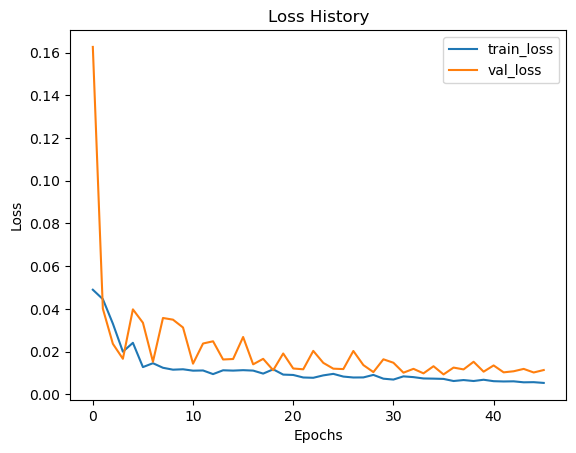

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

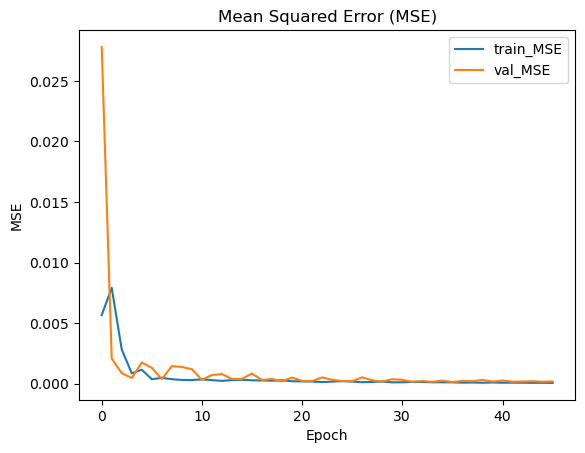

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

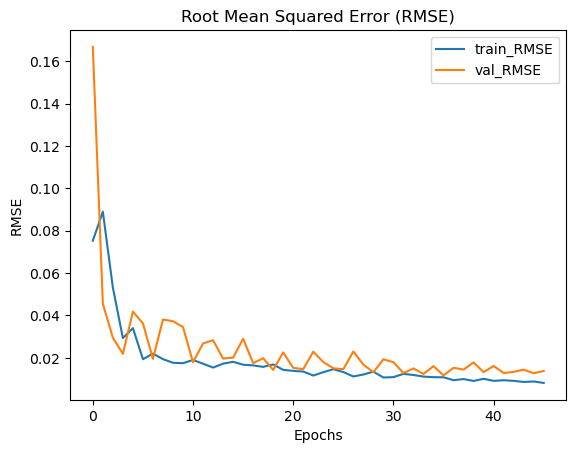

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

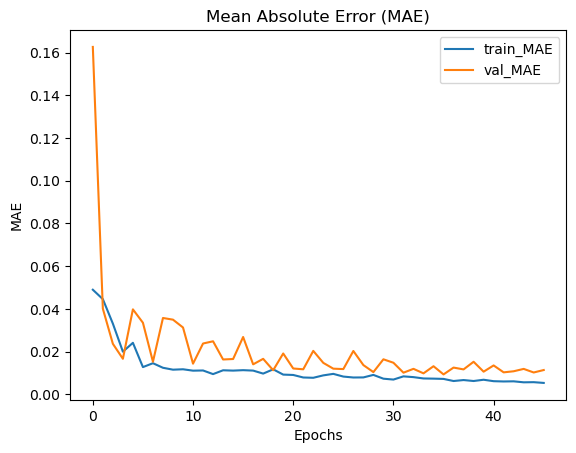

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

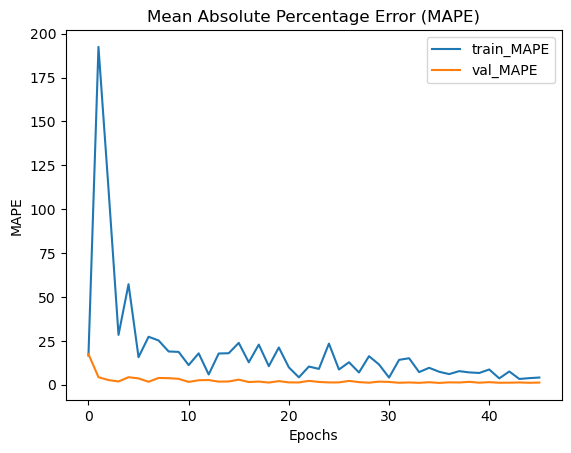

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:37:51.537943: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


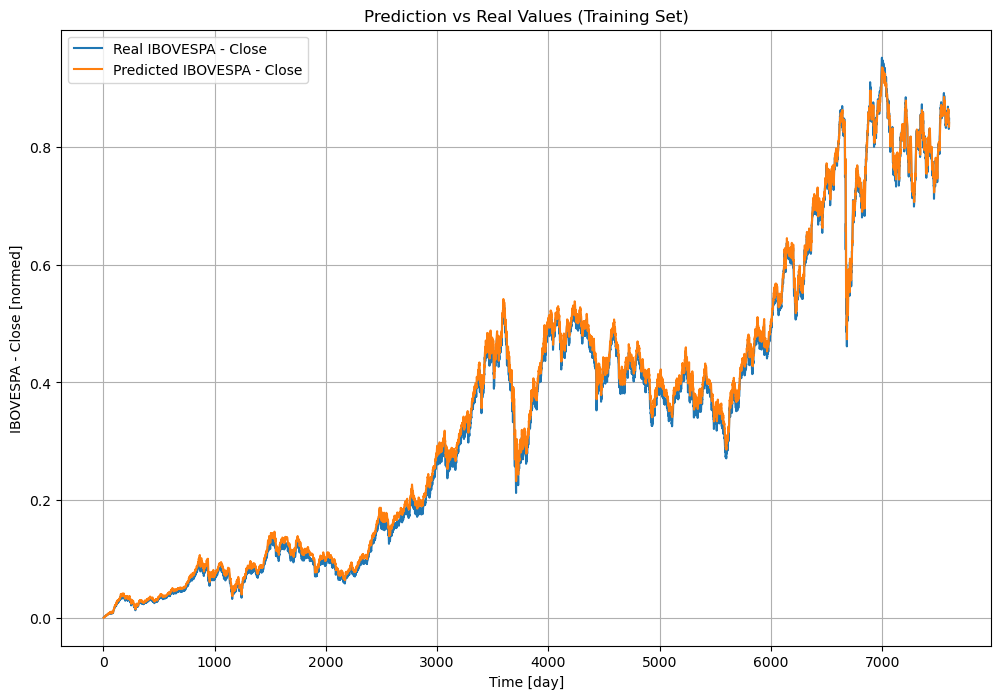

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


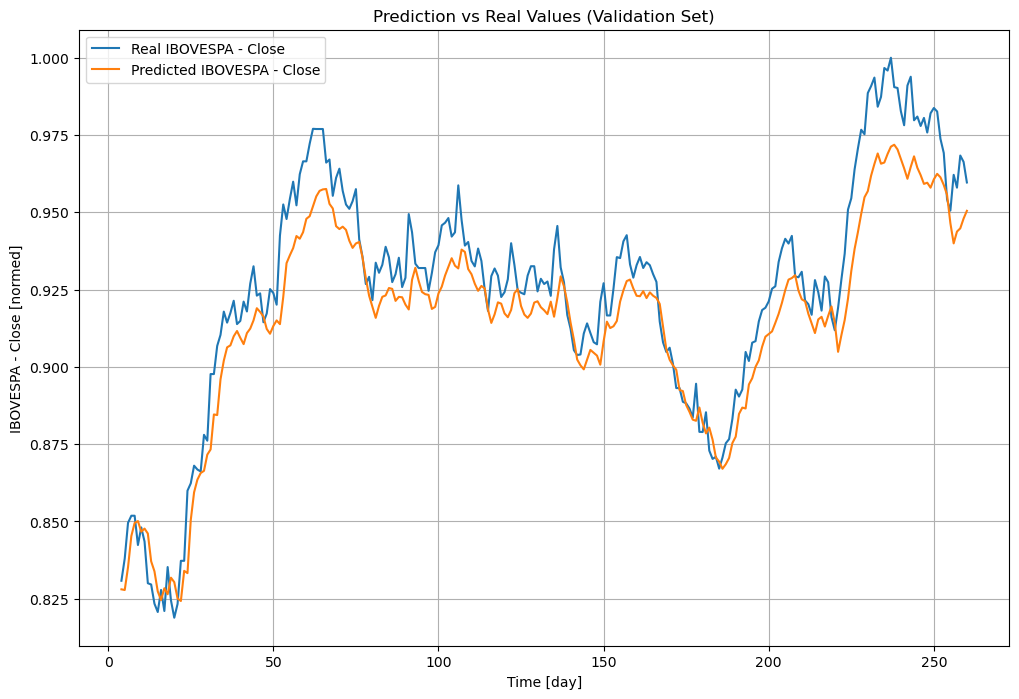

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


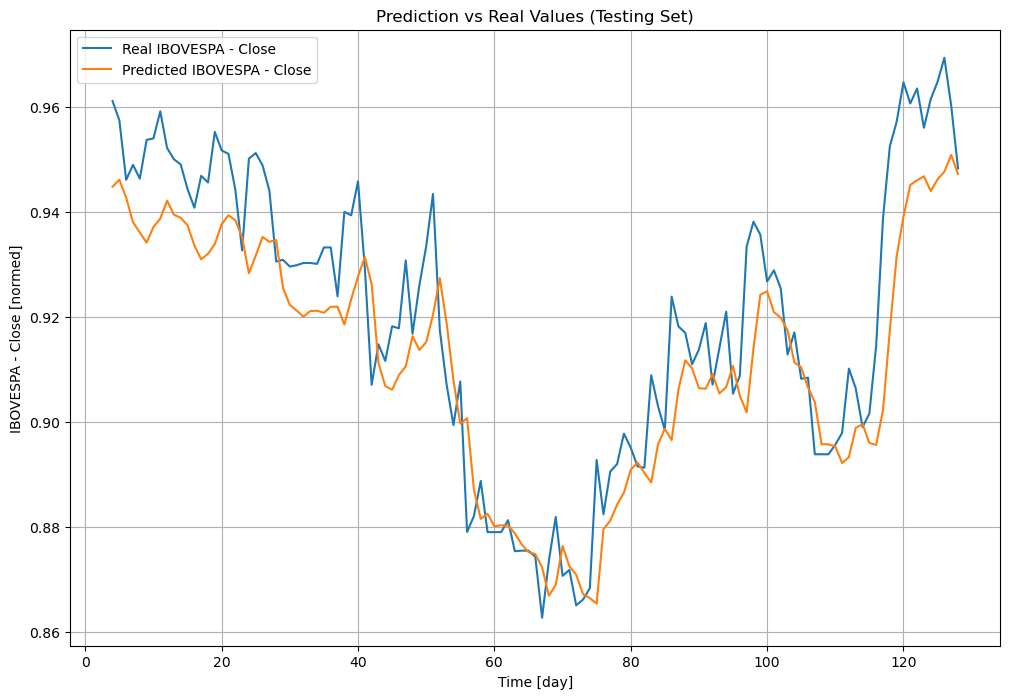

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

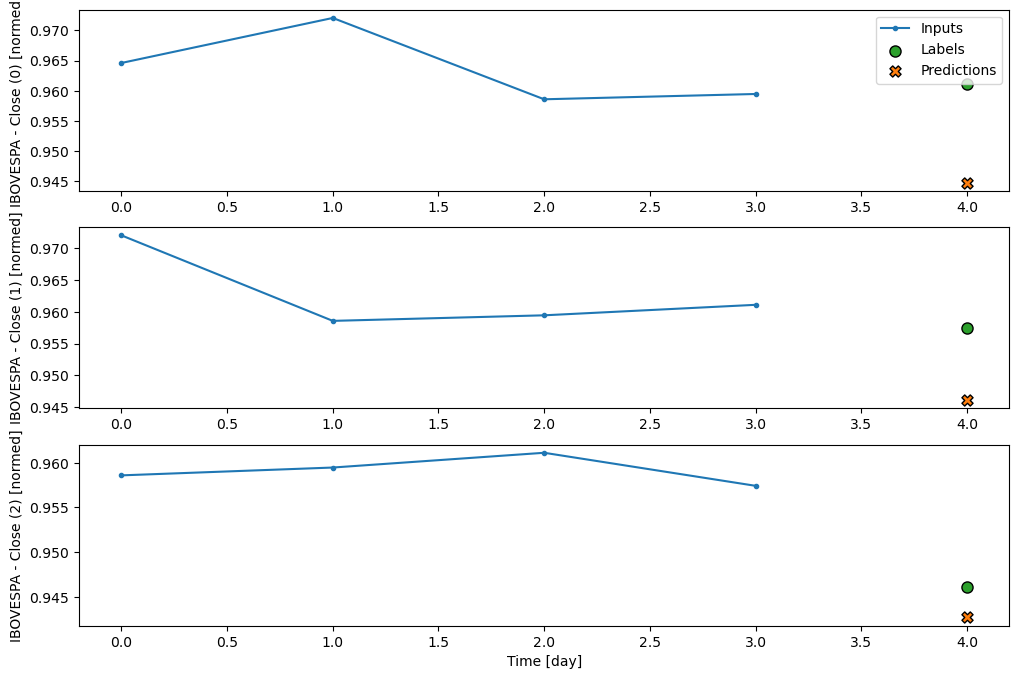

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:47s:941ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[[0.94479215, 0.94479215, 0.94479215, ..., 0.94479215,
         0.94479215, 0.94479215]],

       [[0.9461243 , 0.9461243 , 0.9461243 , ..., 0.9461243 ,
         0.9461243 , 0.9461243 ]],

       [[0.9426905 , 0.9426905 , 0.9426905 , ..., 0.9426905 ,
         0.9426905 , 0.9426905 ]],

       ...,

       [[0.94764304, 0.94764304, 0.94764304, ..., 0.94764304,
         0.94764304, 0.94764304]],

       [[0.9508561 , 0.9508561 , 0.9508561 , ..., 0.9508561 ,
         0.9508561 , 0.9508561 ]],

       [[0.9472102 , 0.9472102 , 0.9472102 , ..., 0.9472102 ,
         0.9472102 , 0.9472102 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')